
# Sauk-Suiattle Sediment Model

This data is compiled to digitally observe the Skagit Watershed, powered by HydroShare. <br />
<img src= "http://www.sauk-suiattle.com/images/Elliott.jpg"
style="float:left;width:175px;padding:20px">   
<br />
This is a beta version of a computational network-based sediment model was developed in order to connect processes of sediment supply on hillslopes, routing in streams, and deposition in reservoirs. The sediment model is developed in a framework called Landlab and driven by a physically-based, distributed hydrology model called DHSVM. The coupled sediment-hydrology model is designed to integrate relevant temporal and spatial scales of hillslope geomorphology, hydroclimatology and river network processes along with answering questions that are relevant to engineering application. The coupled model framework is designed to be applicable in other global watersheds, and could be useful for predicting sediment budgets particularly in the face of environmental and land use/land cover changes. 
<br /> <img src="https://www.washington.edu/brand/files/2014/09/W-Logo_Purple_Hex.png" style="float:right;width:120px;padding:20px">  
<br />
#### A Watershed Dynamics Model by the Watershed Dynamics Research Group in the Civil and Environmental Engineering Department at the University of Washington 

[Erkan To DO - -  add citations to Claire's AGU presentations and DOE report, Landlab paper, DHSVM-PNNL repo, others?]

## To run this notebook:

Click in each shaded cell below and "shift + enter" to run each code block. Alternatively, you can run groups of cells by clicking "Cell" on the menu above and selecting your run options from the pull-down menu. This is also where you can clear outputs from previous runs.

If an error occurs, click on *Kernal* and *Restart and Clear Outputs* in the menu above.

## 1. Introduction
Sediment discharge, its frequency and magnitude, and the size distribution of sediment load vary in space and time in a river. Sediment input into channels can be dominated by a single source such as a stratovolcano (e.g., Glacier Peak), or can be from distributed sources on hillslopes and zero-order basins, as well as from the banks of the channel itself through bank erosion.  Sediment is either transported within the flow as suspended load or transported along the riverbed as bedload. Suspended sediment includes sediments that are transported in suspension as a result of flow shear stress. It is composed of wash load (mostly clay and silt that is more or less continually in suspension) and suspension from bedload during higher flow; bed material in suspension includes coarse silt and sand that may move as bed load during lower flow. Bedload is generally assumed to represent 10% (or more generally in the 5% to 20% range) of the total sediment load. This percentage also depends on the location in the channel network and the type of watershed soil type. The suspended sediment load varies with discharge, often increasing nonlinearly as discharge rises because the greater turbulence associated with higher discharge allows a greater load of sediment to be held in suspension. 

<br /> <img src="https://www.hydroshare.org/resource/d5f1f96849554e03aa98bed5aff36cf7/data/contents/SedimentConcentrationbyVolume_Jakob_Jordon_2001.JPG" style="float:center;width:700px;padding:40px">

Figure 1. Classification of sediment flow processes with respect to sediment concentration, velocity, and process domains (modified from Jakob and Jordan, 2001).

Two related questions of interest for predicting erosion rates and sediment yields in the Puget Sound region are:  

1)	Do rivers that drain stratovolcanos and retreating glaciers exhibit larger erosion rates, and how modern and long-term erosion rates compare? 

2)	Can a single suspendend sediment transport relationship predict loads across Puget Sound basins?

In stratovolcanoes in high Alpine areas like Glacier Peak, a large portion of the loose pyroclastic deposits (clastic rock formed by volcanic explosion or ejected from a volcanic vent) are eroded by glaciers. Currently there are over a dozen glaciers on the sides of this volcano. In the model developed in this Notebook, we highlight network sediment results from seven glaciers; five in the Headwater Suiattle River (HUC 171100060201) including Dusty, Chocolate, Cool, Suiattle, and Honeycomb Glaciers and two in the Miners Creek Suiattle River (HUC 171100060202) including Vista and Ermine Glaciers. 

## 2.0 Methods

### 2.1. Install Python packages and libraries 
The CUAHSI JupyterHub server provides many Python packages and libraries, but to add additional libraries to your personal user space, use the cell below.  To request an Installation to the server, visit https://github.com/hydroshare/hydroshare-jupyterhub, create a New Issue, and add the label 'Installation Request'. Uncomment the lines below to install the library. Python2 and Python3 kernels are both available. If you are a new Landlab user on Hydroshare you are advised to run the code block below in your first run of this tutorial, then comment them out.

In [85]:
#%% Import modules and define functions
import os
import csv
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy.stats

#Import utilities for importing and exporting to HydroShare
from utilities import hydroshare
import ogh

In [190]:
hs=hydroshare.hydroshare()
homedir = ogh.mapContentFolder(str(os.environ["HS_RES_ID"]))

print('Data will be loaded from and saved to:'+homedir)
os.chdir('/home/jovyan/work/notebooks/data/d5f1f96849554e03aa98bed5aff36cf7/d5f1f96849554e03aa98bed5aff36cf7/data/contents')
!pwd

Adding the following system variables:
   HS_USR_NAME = ChristinaBandaragoda
   HS_RES_ID = 87dc5742cf164126a11ff45c3307fd9d
   HS_RES_TYPE = compositeresource
   JUPYTER_HUB_IP = jupyter.cuahsi.org

These can be accessed using the following command: 
   os.environ[key]

   (e.g.)
   os.environ["HS_USR_NAME"]  => ChristinaBandaragoda
Successfully established a connection with HydroShare
Data will be loaded from and saved to:/home/jovyan/work/notebooks/data/87dc5742cf164126a11ff45c3307fd9d/87dc5742cf164126a11ff45c3307fd9d/data/contents
/home/jovyan/work/notebooks/data/d5f1f96849554e03aa98bed5aff36cf7/d5f1f96849554e03aa98bed5aff36cf7/data/contents


#### Run following cells to import extract and copy DHSVM temperature model Outflow.Only files on HydroShare

In [87]:
#hs.getResourceFromHydroShare('f16bdb504c6a4fb39e80ff1070a86704')

In [88]:
#!gunzip /home/jovyan/work/notebooks/data/f16bdb504c6a4fb39e80ff1070a86704/f16bdb504c6a4fb39e80ff1070a86704/data/contents/*/*

In [191]:
# DHSVM model output  - flow at each stream node
streamflow_input='Outflow.Only'

### 2.2 Import DHSVM network files and modeled streamflow 

In [192]:
# GIS file developed from https://github.com/pnnl/DHSVM-PNNL/tree/master/CreateStreamNetwork_PythonV
# Note for Zhuoron: This code needs it's own citation and reference
network_input = os.path.join(homedir, 'streamfile_2km2_sauk.txt')
network_input ='streamfile_2km2_sauk.txt'

In [193]:
!pwd

/home/jovyan/work/notebooks/data/d5f1f96849554e03aa98bed5aff36cf7/d5f1f96849554e03aa98bed5aff36cf7/data/contents


### 2.3 Set Model Parameters 

#### Universal Constants

In [194]:
g=9.81                     # acceleration of gravity (m/s2)
rho_w=1000                 # density of water (kg/m3)
v=10**-6                   # kinematic viscosity of water (m2/s)
sg=2.65                    # specific gravity 
bd_fine=1.13                # bulk density of fine sediments in reservoir 
bd_coarse=1.71              # bulk density of coarse sediments in reservoir 

#### Hydraulic geometry parameters

In [195]:
## hydraulic geometry (HG) parameters (note: a is constant, b is exponent)
ref_stream= 178 # DHSVM stream number where observations are collected that is used to scale other streams. For Elwha, this is the Lake Mills stream.

# stream width @ ref stream
w_const_ref=41.6
## stream depth HG parameters @ ref stream
a_d_ref=0.24
b_d_ref=0.41
### stream velocity HG parameters @ ref stream
a_u_ref=0.10
b_u_ref=0.58

## stream width HG upstream exponent
exp_w_us=0.5
## stream depth HG upstream exponent
exp_d_us=0.4
## stream velocity HG upstream exponent
exp_u_us=0.1

# roughness parameterization
a_n=1.08
b_n=-0.44

#### Geomorphology parameters

In [196]:
Drate=0.2/365.25 # denudation rate [mm/day]- based on computations/literature
beta_mw=10*365.25 # lag time [days] between mass wasting events- exponenetial distribution parameter
init_depth=1 # Set initial depth of sediment in channels [m] 
abrasion_alpha=0.027
abrasion_alpha_Fg=0.027
mw_pcnt_g=0.6 # percent of gravel in mass wasting deposit
mw_pcnt_s=1-mw_pcnt_g # percent of sand in mass wasting deposit

#### Bedload sediment transport parameters

In [197]:
## sediment transport parameterization per Wilcock and Crowe, 2003
# Channel grain size properties at Lake mills gage stream
Ch_Fs_LM=0.37
Ch_Fg_LM=1-Ch_Fs_LM
d90ch_LM=0.0275 # m -  d90 of channel bed= 27.5 mm=0.0275 m
dsandch_LM=0.00093 # m- d_sand of channel bed= 0.93 mm = 0.00093 m
dgravelch_LM=0.0132 # m- d_gravel of channel bed= 13.2 mm = 0.0132 m
dmeanch_LM=0.0125 # m- d_mean of channel bed= 12.5 mm = 0.0125 m

# Wilcock- Crowe Equation Parameters
A_gravel=14
chi_gravel=0.894
exp_gravel=0.5
phi_prime_gravel=1.35

A_sand=14
chi_sand=0.894
exp_sand=0.5
phi_prime_sand=1.35

#### Suspended sediment parameters

In [198]:
# Suspended Sediment Equation Parameters
a_s=1.17*10**-4 # regression coefficient from Curran et al., 2009
b_s_c=3        # regression coefficient for SS concentration from Curran et al., 2009
b_s_l=4        # regression coefficient for SS load from Curran et al., 2009
cf_s=1.07      # log-regression correction factor from Curran et al., 2009
K_ss=0.0864       # unit conversion factor from Curran et al., 2009  


# Network suspended sediment parametrization
# Key references: Patil et al., 2012
# for sand equations
c0_ss=1.1038
c1_ss=2.6626
c2_ss=5.6497
c3_ss=0.3822
c4_ss=-0.6174
c5_ss=0.1315
c6_ss=-0.0091

# for silt equations
tau_c_fines=0.015*(bd_fine-1)
a_w_m=0.08
n_w_m=1.65
b_w_m=3.5
m_w_m=1.88
c1_m=0.15
c2_m=b_w_m/((2*m_w_m-1)**0.5)


### 2.4 Code Model Functions

In [199]:
def find_nearest(array,value):
    val = (np.abs(array-value)).argmin()
    return array[val]

# Upload observed data
def create_q_obs_df(file_name, drainage_area):
    q=pd.read_excel(file_name, sheetname='data', skiprows=[0], header=None, usecols='A:D')
    q.columns=['year','month','day','flow_cfs']
    q_dates=pd.to_datetime(q.loc[:,['year','month','day']])
    q.set_index(q_dates, inplace=True)
    q.drop(['year','month','day'],axis=1, inplace=True)
    q_cms=q.flow_cfs/(3.28084**3)
    q_mmday=q_cms*1000*3600*24/drainage_area
    q=pd.concat([q_cms, q, q_mmday],axis=1)
    q.columns=['flow_cms','flow_cfs', 'flow_mmday']
    return q

def import_obs_folders(obs_folder,streamflow_obs_input_txt):
    os.chdir(obs_folder)
    LM_usgs= np.genfromtxt(streamflow_obs_input_txt,skip_header=1,dtype=str)                   
    n_1=len(LM_usgs[:,0]) # n is number of days in the record
    date_LM=np.full(n_1,'', dtype=object) # Preallocate date_1 matrix
    for x in range(0,n_1): # Cycle through all days of the year
        date_LM_temp=datetime.date(int(LM_usgs[x,0]),int(LM_usgs[x,1]),
                                               int(LM_usgs[x,2]))
        # make numpy array of individual temporary datetime objects
        date_LM[x]=date_LM_temp # enter temporary object into preallocated date matrix
    del(date_LM_temp) # delete temporay object
    
    # Extract remaining variables and convert to standard units:
    Q_day=np.array((LM_usgs[:,3]), dtype='float64')
    Q_day=Q_day/(3.28084**3) # convert from ft^3/s to m^3/s
    SSC_day=np.array(LM_usgs[:,7], dtype='float64')
    SSL_day=np.array(LM_usgs[:,9], dtype='float64')
    T_day=np.array(LM_usgs[:,11], dtype='float64')
    
    LM_data=pd.DataFrame({"Q_m3s": Q_day, "SSC_mgL": SSC_day,
                          "SSL_tonsday":SSL_day, "T_fnu":T_day},index=pd.to_datetime(date_LM))
    
    # Now find the 50 % exceedance flow at Lakem Mills gage- use complete water years only
    Q_curve=LM_data.loc[datetime.date(1994, 10, 1):datetime.date(1997, 9, 30), 'Q_m3s'].values
    Q_curve=np.append(Q_curve,LM_data.loc[datetime.date(2004, 10, 1):datetime.date(2011, 9, 30), 'Q_m3s'].values)
    
    # FUTURE:  Use calibrated DHSVM outputs instead?
    Q_RC=np.sort(Q_curve)
    n_curve=len(Q_curve)
    ep_Q_curve=np.array(range(1,n_curve+1))/(n_curve+1)
    cum_pcntl=ep_Q_curve
    Q_LM_50EP=Q_RC[np.where(cum_pcntl==find_nearest(cum_pcntl, 0.50))] # 50th percentile
            
    return (LM_data, Q_LM_50EP)

def compute_NSE_rs (modeled, observed):
    NSE=1-((np.sum((modeled-observed)**2))/(np.sum((modeled-np.mean(observed))**2)))
    WC,WC_0,WC_r, WC_p, WC_err=scipy.stats.linregress(modeled, observed)
    r2=WC_r**2
    print('r2=',r2)
    print('NSE=',NSE)
    return NSE, r2


def setup_network(model_input_folder):                      
    #os.chdir(model_input_folder)  
    network=pd.read_table(network_input, delimiter='\t', index_col=0,\
                          usecols=[0, 1, 2, 3, 4, 5, 6, 7])
    network.columns=['segment_length_m','local_ca','dest_channel_id',\
                     'segment_slope','total_ca_mean','segment_order',\
                     'channel_class_id'] 
    return (network)

#network=setup_network(model_input_folder)

def run_stochastic_mass_wasting(ref_stream, a_u_ref, b_u_ref, a_d_ref, b_d_ref, a_n, b_n, ng_obs_bar, S, total_ca_ref, total_ca, Qref, Q):  
    rho_w=1000
    # ref stream values for given flow
    Uref=a_u_ref*Qref**b_u_ref
    Dref=a_d_ref*Qref**b_d_ref
    # stream-of-interest values for given flow
    U=Uref*(total_ca**exp_w_us)/(total_ca_ref**exp_w_us)
    D=Dref*(total_ca**exp_d_us)/(total_ca_ref**exp_d_us)
    ng=ng_obs_bar*a_n*D**b_n
    tau=rho_w*g*((ng*U)**(3/2))*S**(1/4)
    u=(tau/rho_w)**0.5
    return tau, u         

def compute_channel_properties(ref_stream, a_u_ref, b_u_ref, a_d_ref, b_d_ref, a_n, b_n, ng_obs_bar, S, total_ca_ref, total_ca, Qref, Q):  
    rho_w=1000
    # ref stream values for given flow
    Uref=a_u_ref*Qref**b_u_ref
    Dref=a_d_ref*Qref**b_d_ref
    # stream-of-interest values for given flow
    U=Uref*(total_ca**exp_u_us)/(total_ca_ref**exp_u_us)
    D=Dref*(total_ca**exp_d_us)/(total_ca_ref**exp_d_us)
    ng=ng_obs_bar*a_n*D**b_n
    tau=rho_w*g*((ng*U)**(3/2))*S**(1/4)
    u_star=(tau/rho_w)**0.5
    return tau, u_star         
        
def run_wc2003_2F_model (tau, tau_r_sand,tau_r_gravel):
    # Constants
    A=14
    chi=0.894
    exp=0.5
    phi_prime=1.35 
             
    # Run WC 2003 Two-Fraction Model
    phi_gravel=tau/tau_r_gravel
    phi_sand=tau/tau_r_sand
    
    if phi_gravel<phi_prime:
        Wstar_gravel=0.002*(phi_gravel)**7.5
    elif chi/((phi_gravel)**exp)>=1: # Checka that term in paraentheses is not negative
       Wstar_gravel=0
    else:
        Wstar_gravel=A*((1-(chi/((phi_gravel)**exp)))**(4.5))

    if phi_sand<phi_prime:
        Wstar_sand=0.002*(phi_sand)**7.5
    elif chi/((phi_sand)**exp)>=1: # Checka that term in paraentheses is not negative
       Wstar_sand=0
    else:
        Wstar_sand=A*((1-(chi/((phi_sand)**exp)))**(4.5))        
    return (Wstar_gravel, Wstar_sand)    

### 2.5 Create arrays of streamflow forcings

#### Set sediment model run time = length of modeled streamflow input file output.Only

In [200]:
forcing_start_date=datetime.date(1915,1,1)
forcing_end_date=datetime.date(2011,1,1)



In [201]:
!pwd

/home/jovyan/work/notebooks/data/d5f1f96849554e03aa98bed5aff36cf7/d5f1f96849554e03aa98bed5aff36cf7/data/contents


In [202]:
#List of all links in network for running sediment model
stream_columns=['Date',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439]
   
forcing_date_range=pd.date_range(forcing_start_date, forcing_end_date)
streamflow=pd.DataFrame(index=forcing_date_range, columns=stream_columns)
#streamflow.loc[forcing_date_range[0],:]=pd.read_table(streamflow_input, skiprows=[0,1], header=None,sep='\s+')
streamflow=pd.read_table(streamflow_input, skiprows=[0,1], header=None,sep='\s+')
streamflow.columns=stream_columns        
streamflow=streamflow.set_index('Date', drop=True)
streamflow.index = pd.to_datetime(streamflow.index)
streamflow
type(streamflow.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [203]:

Qmod_median=streamflow.median(axis=0)
pickle.dump(streamflow, open("streamflow.py", "wb"))
pickle.dump(Qmod_median, open("Qmod_median.py", "wb"))

In [204]:
#List to run sediment in Headwaters Suiattle HUC12 basin only  - extracted from ArcGIS map SaukSediment.mxd 

headstream_columns=[260,270,276,298,300,301,316,317,318,323,325,329,333,339,340,341,342,345,349,351,352,368,371]
headstream=streamflow.loc[:,headstream_columns]
Qmod_median=headstream.median(axis=0)
pickle.dump(headstream, open("streamflow.json", "wb"))
pickle.dump(Qmod_median, open("Qmod_median.json", "wb"))

In [205]:
print(Qmod_median)

260    0.79325
270    0.64735
276    0.07100
298    0.55660
300    0.01710
301    0.48690
316    0.41580
317    0.11500
318    0.01210
323    0.05640
325    0.39380
329    0.06120
333    0.29765
339    0.25555
340    0.18980
341    0.02510
342    0.03230
345    0.15585
349    0.01650
351    0.10900
352    0.04940
368    0.04560
371    0.03750
dtype: float64


In [206]:
ref_stream=260

### 2.6 Create sediment model network file

In [207]:
network=setup_network(homedir)
# Downstream links and distances
ds=pd.DataFrame(index=network.index, columns=['ds_strms','ds_dist_array','ds_dist_m']) # establish array of downstream stream numbers
strm_orders_rev=np.unique(network.segment_order)[::-1] # get all segement orders in the watershed and sort from highest to lowest
for st_o in strm_orders_rev:
    for i in network.index:
        if network.segment_order.loc[i]==st_o: # go in order of stream orders
            j=network.loc[i, 'dest_channel_id']
            if j in network.index:
                ds.loc[i,'ds_strms']=np.append(j, ds.loc[j,'ds_strms'])
                ds.loc[i,'ds_dist_array']=np.append(network.loc[j, 'segment_length_m'], ds.loc[j,'ds_strms'])
                ds.loc[i,'ds_dist_m']=np.nansum(ds.loc[i,'ds_dist_array'])
            else:
                ds.loc[i,'ds_strms']=[]
                ds.loc[i,'ds_dist_array']=[]
                ds.loc[i,'ds_dist_m']=0
                
network=pd.concat([network, ds], axis=1, join_axes=[network.index]) # add these to network array 
network[['ds_dist_m']]=network[['ds_dist_m']].astype(float)
network = network.loc[:,~network.columns.duplicated()] # Ensure that there are no duplicate columns!
    
# Stream Width- assume constant
width=pd.DataFrame(index=network.index, columns=['width'],
                       data=w_const_ref*((network['total_ca_mean'].values)**exp_w_us)/(((network['total_ca_mean'][ref_stream])**exp_w_us)))
network=pd.concat([network, width],axis=1, join_axes=[network.index]) # add these to network array
    

In [208]:
#Use for full network
#strm_link_vals=network.index

#Use for smaller network
strm_link_vals=headstream_columns


In [209]:
!ls -lt


total 592280
-rw-r--r-- 1 jovyan users      1239 Jan 29 02:07 Qmod_median.json
-rw-r--r-- 1 jovyan users   6803483 Jan 29 02:07 streamflow.json
-rw-r--r-- 1 jovyan users      6330 Jan 29 02:07 Qmod_median.py
-rw-r--r-- 1 jovyan users 124709627 Jan 29 02:07 streamflow.py
-rwxrwx--- 1 root   users     80820 Jan 29 02:07 Sauk Sediment Headwaters Model 20190125.ipynb
-rw-r--r-- 1 jovyan users 202937355 Jan 29 02:00 Outflow.Only
drwxr-sr-x 2 jovyan users      4096 Jan 29 01:44 2019-01-29_0126
-rw-r--r-- 1 jovyan users       264 Jan 29 01:41 tL_mw.npy
-rw-r--r-- 1 jovyan users       264 Jan 29 01:41 time_mw.npy
-rw-r--r-- 1 jovyan users     21976 Jan 29 01:41 C_ss.npy
-rw-r--r-- 1 jovyan users     21976 Jan 29 01:41 Vs_dep.npy
-rw-r--r-- 1 jovyan users      1000 Jan 29 01:41 Vm_t_annual.npy
-rw-r--r-- 1 jovyan users      1000 Jan 29 01:41 Vss_t_annual.npy
-rw-r--r-- 1 jovyan users      1000 Jan 29 01:41 Vsb_t_annual.npy
-rw-r--r-- 1 jovyan users      1000 Jan 29 01:41 Vs_t_annual.npy
-rw-r--

In [210]:

Qmod_median[ref_stream]

0.79325000000000001

In [211]:
# Grain Size
#os.chdir(model_data_folder)
# strm_link_vals=pickle.load(open('strm_link_vals.py', 'rb')) # stream link values of interest
n_strms=len(strm_link_vals) # number of streams/tributary areas
strm_orders=np.unique(network.segment_order)
    
## Upstream grain size diameters from Downstream Fining Equation
d90_ch_us=d90ch_LM/np.exp(-abrasion_alpha*(network.ds_dist_m-network.ds_dist_m[ref_stream])/1000)
dsand_ch_us=dsandch_LM/np.exp(-abrasion_alpha*(network.ds_dist_m-network.ds_dist_m[ref_stream])/1000)
dgravel_ch_us=dgravelch_LM/np.exp(-abrasion_alpha*(network.ds_dist_m-network.ds_dist_m[ref_stream])/1000)
dmean_ch_us=dmeanch_LM/np.exp(-abrasion_alpha*(network.ds_dist_m-network.ds_dist_m[ref_stream])/1000)

Qmod_median=pickle.load(open('Qmod_median.json', 'rb'))
H_median_lm=a_d_ref*(Qmod_median[ref_stream])**b_d_ref   
H_median_all=H_median_lm*((network['total_ca_mean'].values)**exp_d_us)/(((network['total_ca_mean'][ref_stream])**exp_d_us))
ng_bar=(1/(np.sqrt(8*g)))*(H_median_all**(1/6))/(1.26-2.16*np.log10(d90_ch_us/H_median_all))
    
network=pd.concat([network,pd.DataFrame({"d90_ch_m": d90_ch_us,
                                          "dsand_ch_m": dsand_ch_us,
                                          "dgravel_ch_m": dgravel_ch_us,
                                          "dmean_ch_m": dmean_ch_us,
                                          "Ch_Fs_strms": Ch_Fs_LM, # start out with all the same as LM and will let evolve
                                          "ng_bar":ng_bar},index=strm_link_vals)], axis=1, join_axes=[network.index]) 
    
network=network.loc[strm_link_vals,:]
del(dsand_ch_us, dgravel_ch_us, dmean_ch_us)
    #os.chdir(model_data_folder)
pickle.dump(network, open("network.json", "wb"))

### 2.7 Initialize model 

In [212]:
strm_link_vals=network.index # stream link values of interest
n_strms=len(strm_link_vals) # number of streams/tributary areas
strm_orders=np.unique(network.segment_order) # array of unique stream orders
start_year_len=len(streamflow.index[streamflow.index.year==streamflow.index[0].year]) # number of days in first year

# Preallocate sediment volume data frames representing sediment "buckets" at the end of each timestep (day)
# Vg=gravel; Vs=sand; Vm=mud (silt, clay)
# Volumes stored on bed [m3]
Vg_b=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))
Vs_b=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))
Vm_b=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))

# Volumes deposited from mass wasting event [m3]
Vg_mw=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))
Vs_mw=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))
Vm_mw=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))

# Volume of bedload that stream had capacity to transport  [m3]
Vg_cap=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))
Vs_cap=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))

# Volume transported out of stream  [m3]
Vg_t=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))
Vs_t=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))
Vsb_t=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))
Vss_t=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))
Vm_t=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))

# Preallocate sediment volume data frames representing sediment "buckets" at the end of each year
# Volumes stored on bed [m3]
Vg_b_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))
Vs_b_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))
Vm_b_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))
# Volumes deposited from mass wasting event [m3]
Vg_mw_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))
Vs_mw_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))
Vm_mw_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))
# Volume of bedload  that stream had capacity to transport  [m3]
Vg_cap_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year)) 
Vs_cap_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))
# Volume transported out of stream  [m3]
Vg_t_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))
Vs_t_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))
Vsb_t_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))
Vss_t_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))
Vm_t_annual=pd.DataFrame(0, index=strm_link_vals, columns=np.unique(streamflow.index.year))

# Other- temporary
C_ss=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))
Vs_dep=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,start_year_len+1))

#Set any initial (time=0) conditions in streams
# Volumes stored on bed [m3]
Vg_b.loc[:,0]=0.33*init_depth*network.segment_length_m*network.width # set initial volume of sediment stored in channel
Vs_b.loc[:,0]=0.34*init_depth*network.segment_length_m*network.width # set initial volume of sediment stored in channel
Vg_b.loc[:,0]=0.33*init_depth*network.segment_length_m*network.width # set initial volume of sediment stored in channel
# Volumes deposited from mass wasting event [m3]
Vg_mw.loc[:,0]=0
Vs_mw.loc[:,0]=0
Vm_mw.loc[:,0]=0

# Volume that stream had capacity to transport  [m3]
Vg_cap.loc[:,0]=0
Vs_cap.loc[:,0]=0

# Volume transported out of stream  [m3]
Vg_t.loc[:,0]=0
Vs_t.loc[:,0]=0
Vm_t.loc[:,0]=0

# Set arrays for times between mass wasting events
time_mw=pd.DataFrame(0, index=strm_link_vals, columns=['output']) # time since last mass wasting event for each stream link
tL_mw=np.ceil(np.random.exponential(scale=beta_mw, size=len(strm_link_vals))) # time (years) until first mass wasting event- randomly sampled from exponential distribution
tL_mw=pd.DataFrame(data=tL_mw, index=strm_link_vals, columns=['output']) # turn into a data frame that will grow


# 3.0 Run Model 

In [213]:
start = time.time()
date_string=time.strftime("%Y-%m-%d_%H%M")
os.mkdir(date_string)
day_of_year=0
## RUN MODEL
for i in range (0,len(streamflow.index)):
    print(streamflow.index[i])
    date=streamflow.index[i]
    day_of_year=day_of_year+1
    time_mw=time_mw+1 # start new year
   # run stochastic mass wasting generator for all stream links
    for st_o in strm_orders:
        for j in network.index.values:
            if network.segment_order.loc[j]==st_o: # go in order of stream orders
                if time_mw.loc[j,'output']==tL_mw.loc[j,'output']: # if time since the last mass wasting event is the same as randomly generated lag time
                    # Generate random values for percent gravel, sand, and mud,
                    temp_rand=np.random.rand(3)
                    mw_pcnts=temp_rand/sum(temp_rand)
                    # Generate mass wasting volumes based on denudation rate
                    Vg_mw.loc[j,day_of_year]=mw_pcnts[0]*Drate*network.loc[j,'local_ca']*(1/1000)*tL_mw.loc[j,'output']
                    Vs_mw.loc[j,day_of_year]=mw_pcnts[1]*Drate*network.loc[j,'local_ca']*(1/1000)*tL_mw.loc[j,'output']                   
                    Vm_mw.loc[j,day_of_year]=mw_pcnts[2]*Drate*network.loc[j,'local_ca']*(1/1000)*tL_mw.loc[j,'output']                   
                    # Update mass wasting clocks
                    time_mw.loc[j,'output']=0 # Reset counter until next mass wasting event
                    tL_mw.loc[j,'output']=np.ceil(np.random.exponential(scale=beta_mw))  # generate a new lag time until next mass wasting event and add it to array of lag times#
                else: # If have not reach the lag time for a mass wasting event at the stream then the volume will be the same as last year
                    # Not mass wasting volume is added
                    Vg_mw.loc[j,day_of_year]=0
                    Vs_mw.loc[j,day_of_year]=0
                    Vm_mw.loc[j,day_of_year]=0

                # Add mass wasting volume to the bed from previous timestep
                Vg_b.loc[j,day_of_year]=Vg_b.loc[j,day_of_year-1]+Vg_mw.loc[j,day_of_year]
                Vs_b.loc[j,day_of_year]=Vs_b.loc[j,day_of_year-1]+Vs_mw.loc[j,day_of_year] 
                Vm_b.loc[j,day_of_year]=Vm_b.loc[j,day_of_year-1]+Vm_mw.loc[j,day_of_year] 

                # Add in sediment from upstream tributaries
                if st_o!=1: # if not at a headwater stream (i.e., stream order >1), need to add volume of sediment coming from upstream
                    feeder_links=network.loc[network['dest_channel_id']==j].index.values # find the stream links that feed into the link which are immediately upstream
                    # sum up the volume transported out of the upstream link and add to current volume
                    Vg_b.loc[j,day_of_year]=Vg_b.loc[j,day_of_year]+np.nansum(Vg_t.loc[feeder_links,day_of_year])  
                    Vs_b.loc[j,day_of_year]=Vs_b.loc[j,day_of_year]+np.nansum(Vs_t.loc[feeder_links,day_of_year])
                    Vm_b.loc[j,day_of_year]=Vm_b.loc[j,day_of_year]+np.nansum(Vm_t.loc[feeder_links,day_of_year])
                
                # Compute shear stress and shear velocity from modeled flow
                Q=streamflow.loc[date,j]
                Qvol=Q*3600*24 # m3 of streamflow throughout the day [m3]
                tau_strm, u_strm= compute_channel_properties(ref_stream, a_u_ref, b_u_ref, a_d_ref, b_d_ref, a_n, b_n, network['ng_bar'][j], 
                                                             network.segment_slope[j], network['total_ca_mean'][ref_stream], network['total_ca_mean'][j], 
                                                             streamflow.loc[date,ref_stream], Q)

                # Suspended Sediment
                C_ss.loc[j,day_of_year]=(Vs_b.loc[j,day_of_year]+Vm_b.loc[j,day_of_year])/Qvol # Concentration of suspended sediment (unitless)
                
                # Suspended sediment- silt: Compute deposition and transport
                if tau_strm>tau_c_fines:
                    Vm_d=0
                else: 
                    if C_ss.loc[j,day_of_year]<=c1_m:
                        v_ss_m=a_w_m*(c1_m**n_w_m)/((c1_m**2+b_w_m**2)**m_w_m)
                    if C_ss.loc[j,day_of_year]>c2_m:
                        v_ss_m=a_w_m*(c2_m**n_w_m)/((c2_m**2+b_w_m**2)**m_w_m)
                    else:
                        v_ss_m=a_w_m*(C_ss.loc[j,day_of_year]**n_w_m)/((C_ss.loc[j,day_of_year]**2+b_w_m**2)**m_w_m)                        
                    Vm_d=(1-(tau_strm/tau_c_fines))*v_ss_m*C_ss.loc[j,day_of_year]*network.loc[j,'segment_length_m']*network.loc[j,'width']*3600*24
                Vm_t.loc[j,day_of_year]=Vm_b.loc[j,day_of_year]-min(Vm_d, Vm_b.loc[j,day_of_year])
                Vm_b.loc[j,day_of_year]=max(Vm_b.loc[j,day_of_year]-Vm_t.loc[j,day_of_year],0)
                
                # Suspended sediment- sand: Compute deposition/erosion
                #v_ss_s=g*(network.loc[j,'dsand_ch_m']**2)*(sg-1)/(18*v) # settling velocity of sand
                d_star_ss=(((sg-1)*g*network.loc[j,'dsand_ch_m']**3)/(v**2))**(1/3)
                v_ss_s=(v/network.loc[j,'dsand_ch_m'])*(np.sqrt((1/4)*(24/1.5)**(2/1)+((4*d_star_ss**3)/(3*1.5))**(1/1))-(1/2)*(24/1.5)**(1/1))**1                
                Z_R=v_ss_s/(0.41*u_strm)
                int_Z_R=1/(c0_ss+c1_ss*Z_R+c2_ss*Z_R**2+c3_ss*Z_R**3+c4_ss*Z_R**4+c5_ss*Z_R**5+c6_ss*Z_R**6)
                Vs_dep_comp=v_ss_s*C_ss.loc[j,day_of_year]/int_Z_R*network.loc[j,'segment_length_m']*network.loc[j,'width']*3600*24 #m3/day- volume of deposited sand
                if Vs_dep_comp<0:
                    Vs_dep.loc[j,day_of_year]=0
                elif Vs_dep_comp>Vs_b.loc[j,day_of_year]:
                    Vs_dep.loc[j,day_of_year]=Vs_b.loc[j,day_of_year]
                else:
                    Vs_dep.loc[j,day_of_year]=Vs_dep_comp

                # Sand transported out as suspended sediment
                Vss_t.loc[j,day_of_year]=Vs_b.loc[j,day_of_year]-Vs_dep.loc[j,day_of_year]
                
                # Sand remaining on bed, with potential to be transferred as bedload
                Vs_b.loc[j,day_of_year]=Vs_dep.loc[j,day_of_year]
                
                # Recompute W&C 2003 parameterizaion of sand and gravel on the channel bed
                network.loc[j,'Ch_Fs_strms']=Vs_b.loc[j,day_of_year]/(Vs_b.loc[j,day_of_year]+Vg_b.loc[j,day_of_year])
                tau_star_rsm=0.021+0.015*np.exp(-20*network.loc[j,'Ch_Fs_strms']) # dimensionless reference shear stress for mean grain size
                tau_rsm=tau_star_rsm*(sg-1)*rho_w*g*(network.loc[j,'dmean_ch_m']) # reference shear stress for mean grain size [N/m2]
                b_sand=0.67/(1+np.exp(1.5-(network.loc[j,'dsand_ch_m']/network.loc[j,'dmean_ch_m']))) # b parameter for sand
                b_gravel=0.67/(1+np.exp(1.5-(network.loc[j,'dgravel_ch_m']/network.loc[j,'dmean_ch_m']))) # b parameter for gravel
                tau_r_sand=tau_rsm*(network.loc[j,'dsand_ch_m']/network.loc[j,'dmean_ch_m'])**b_sand # reference tau for sand [N/m2]
                tau_r_gravel=tau_rsm*(network.loc[j,'dgravel_ch_m']/network.loc[j,'dmean_ch_m'])**b_gravel # reference tau for gravel [N/m2]
                tau_star_r_sand=tau_r_sand/(rho_w*g*(sg-1)*network.loc[j,'dsand_ch_m'])
                tau_star_r_gravel=tau_r_gravel/(rho_w*g*(sg-1)*network.loc[j,'dgravel_ch_m'])
                         
                # Compute Bedload sediment transport capacity with calibrated Wilcock and Crowe equation
                Wstar_gravel, Wstar_sand=run_wc2003_2F_model (tau_strm, tau_star_r_sand, tau_star_r_gravel)
                
                # Compute gravel transport capacity, volume transported, and volume remaining
                Vg_cap.loc[j,day_of_year]=3600*24*((u_strm)**3)*Wstar_gravel*(1-network.loc[j,'Ch_Fs_strms'])/((sg-1)*g)*network.loc[j,'width'] #  m3 (unit is m3/day; timestep is 1 day)
                Vg_t.loc[j,day_of_year]=np.min([Vg_cap.loc[j,day_of_year],Vg_b.loc[j,day_of_year]]) # gravel: volume transported is the minimum between available volume and capacity of flow
                Vg_b.loc[j,day_of_year]=Vg_b.loc[j,day_of_year]-Vg_t.loc[j,day_of_year] # new volume deposited in stream- difference between existing volume and volume transported

                # Compute sand bedload transport capacity, volume transported, and volume remaining
                Vs_cap.loc[j,day_of_year]=3600*24*((u_strm)**3)*Wstar_sand*(network.loc[j,'Ch_Fs_strms'])/((sg-1)*g)*network.loc[j,'width'] # m3 (unit is m3/day; timestep is 1 day)
                Vsb_t.loc[j,day_of_year]=np.min([Vs_cap.loc[j,day_of_year],Vs_b.loc[j,day_of_year]]) # sand: volume transported is the minimum between available volume and capacity of flow
                Vs_t.loc[j,day_of_year]=Vsb_t.loc[j,day_of_year]+Vss_t.loc[j,day_of_year] # add volumes of sand transported as bedload and suspended load 
                Vs_b.loc[j,day_of_year]=Vs_b.loc[j,day_of_year]-Vsb_t.loc[j,day_of_year] # new volume deposited in stream- difference between existing volume and volume transported                             
                
    if date.month==12 and date.day==31:
        if date.year==streamflow.index[streamflow.index.year==streamflow.index[-1].year][0].year:
            next_year_len=0
        else: next_year_len=len(streamflow.index[streamflow.index.year==date.year+1])
        
        Vg_b_last=Vg_b.loc[:, Vg_b.columns[-1]]
        Vs_b_last=Vs_b.loc[:, Vs_b.columns[-1]]
        Vm_b_last=Vm_b.loc[:, Vm_b.columns[-1]]
        Vg_mw_last=Vg_mw.loc[:, Vg_mw.columns[-1]]
        Vs_mw_last=Vs_mw.loc[:, Vs_mw.columns[-1]]
        Vm_mw_last=Vm_mw.loc[:, Vm_mw.columns[-1]]
        Vg_cap_last=Vg_cap.loc[:, Vg_cap.columns[-1]]
        Vs_cap_last=Vs_cap.loc[:, Vs_cap.columns[-1]]
        Vg_t_last=Vg_t.loc[:, Vg_t.columns[-1]]
        Vs_t_last=Vs_t.loc[:, Vs_t.columns[-1]]
        Vsb_t_last=Vsb_t.loc[:, Vsb_t.columns[-1]]
        Vss_t_last=Vss_t.loc[:, Vss_t.columns[-1]]
        Vm_t_last=Vm_t.loc[:, Vm_t.columns[-1]]
        C_ss_last=C_ss.loc[:, C_ss.columns[-1]]
        Vs_dep_last=Vs_dep.loc[:, C_ss.columns[-1]]

        Vg_b_annual.loc[:, date.year]=Vg_b_last
        Vs_b_annual.loc[:, date.year]=Vs_b_last
        Vg_mw_annual.loc[:, date.year]=Vg_mw[1::].sum(axis=1)
        Vs_mw_annual.loc[:, date.year]=Vs_mw[1::].sum(axis=1)
        Vg_cap_annual.loc[:, date.year]=Vg_cap[1::].sum(axis=1)
        Vs_cap_annual.loc[:, date.year]=Vs_cap[1::].sum(axis=1)
        Vg_t_annual.loc[:, date.year]=Vg_t[1::].sum(axis=1)
        Vs_t_annual.loc[:, date.year]=Vs_t[1::].sum(axis=1)
        Vsb_t_annual.loc[:, date.year]=Vsb_t[1::].sum(axis=1)
        Vss_t_annual.loc[:, date.year]=Vss_t[1::].sum(axis=1)
        Vm_t_annual.loc[:, date.year]=Vm_t[1::].sum(axis=1)
        
        np.save('Vg_b_annual', Vg_b_annual)
        np.save('Vs_b_annual', Vs_b_annual)
        np.save('Vg_mw_annual', Vg_mw_annual)   
        np.save('Vs_mw_annual', Vs_mw_annual)   
        np.save('Vg_cap_annual', Vg_cap_annual)
        np.save('Vs_cap_annual', Vs_cap_annual)
        np.save('Vg_t_annual', Vg_t_annual)
        np.save('Vs_t_annual', Vs_t_annual)
        np.save('Vsb_t_annual', Vsb_t_annual)
        np.save('Vss_t_annual', Vss_t_annual)
        np.save('Vm_t_annual', Vm_t_annual)
        np.save('time_mw', time_mw)
        np.save('tL_mw', tL_mw)
                
        Vg_b=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1))
        Vs_b=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1))
        Vg_mw=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1))
        Vs_mw=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1))
        Vg_cap=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1))
        Vs_cap=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1))
        Vg_t=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1))
        Vs_t=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1))
        Vsb_t=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1))
        Vss_t=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1))
        Vm_t=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1))
        C_ss=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1)) 
        Vs_dep=pd.DataFrame(0, index=strm_link_vals, columns=np.arange(0,next_year_len+1)) 

        Vg_b.loc[:, Vg_b.columns[0]]=Vg_b_last
        Vs_b.loc[:, Vs_b.columns[0]]=Vs_b_last
        Vg_mw.loc[:, Vg_mw.columns[0]]=Vg_mw_last
        Vs_mw.loc[:, Vs_mw.columns[0]]=Vs_mw_last
        Vg_cap.loc[:, Vg_cap.columns[0]]=Vg_cap_last
        Vs_cap.loc[:, Vs_cap.columns[0]]=Vs_cap_last
        Vg_t.loc[:, Vg_t.columns[0]]=Vg_t_last
        Vs_t.loc[:, Vs_t.columns[0]]=Vs_t_last
        Vsb_t.loc[:, Vsb_t.columns[0]]=Vsb_t_last
        Vss_t.loc[:, Vss_t.columns[0]]=Vss_t_last
        Vm_t.loc[:, Vm_t.columns[0]]=Vm_t_last
        C_ss.loc[:, C_ss.columns[0]]=C_ss_last
        Vs_dep.loc[:, Vs_dep.columns[0]]=Vs_dep_last
        
        day_of_year=0


# Save results!
end = time.time()
print(end - start)

np.save('Vg_b_annual', Vg_b_annual)
np.save('Vs_b_annual', Vs_b_annual)
np.save('Vg_mw_annual', Vg_mw_annual)
np.save('Vs_mw_annual', Vs_mw_annual)
np.save('Vg_cap_annual', Vg_cap_annual)
np.save('Vs_cap_annual', Vs_cap_annual)
np.save('Vg_t_annual', Vg_t_annual)
np.save('Vs_t_annual', Vs_t_annual)
np.save('Vsb_t_annual', Vsb_t_annual)
np.save('Vss_t_annual', Vss_t_annual)
np.save('Vm_t_annual', Vm_t_annual)
np.save('Vs_dep', Vs_dep)
np.save('C_ss',  C_ss)
np.save('time_mw', time_mw)
np.save('tL_mw', tL_mw)

1915-01-02 00:00:00
1915-01-03 00:00:00
1915-01-04 00:00:00
1915-01-05 00:00:00


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in double_scalars


1915-01-06 00:00:00
1915-01-07 00:00:00
1915-01-08 00:00:00
1915-01-09 00:00:00
1915-01-10 00:00:00
1915-01-11 00:00:00
1915-01-12 00:00:00
1915-01-13 00:00:00
1915-01-14 00:00:00
1915-01-15 00:00:00
1915-01-16 00:00:00
1915-01-17 00:00:00
1915-01-18 00:00:00
1915-01-19 00:00:00
1915-01-20 00:00:00
1915-01-21 00:00:00
1915-01-22 00:00:00
1915-01-23 00:00:00
1915-01-24 00:00:00
1915-01-25 00:00:00
1915-01-26 00:00:00
1915-01-27 00:00:00
1915-01-28 00:00:00
1915-01-29 00:00:00
1915-01-30 00:00:00
1915-01-31 00:00:00
1915-02-01 00:00:00
1915-02-02 00:00:00
1915-02-03 00:00:00
1915-02-04 00:00:00
1915-02-05 00:00:00
1915-02-06 00:00:00
1915-02-07 00:00:00
1915-02-08 00:00:00
1915-02-09 00:00:00
1915-02-10 00:00:00
1915-02-11 00:00:00
1915-02-12 00:00:00
1915-02-13 00:00:00
1915-02-14 00:00:00
1915-02-15 00:00:00
1915-02-16 00:00:00
1915-02-17 00:00:00
1915-02-18 00:00:00
1915-02-19 00:00:00
1915-02-20 00:00:00
1915-02-21 00:00:00
1915-02-22 00:00:00
1915-02-23 00:00:00
1915-02-24 00:00:00


1916-02-20 00:00:00
1916-02-21 00:00:00
1916-02-22 00:00:00
1916-02-23 00:00:00
1916-02-24 00:00:00
1916-02-25 00:00:00
1916-02-26 00:00:00
1916-02-27 00:00:00
1916-02-28 00:00:00
1916-02-29 00:00:00
1916-03-01 00:00:00
1916-03-02 00:00:00
1916-03-03 00:00:00
1916-03-04 00:00:00
1916-03-05 00:00:00
1916-03-06 00:00:00
1916-03-07 00:00:00
1916-03-08 00:00:00
1916-03-09 00:00:00
1916-03-10 00:00:00
1916-03-11 00:00:00
1916-03-12 00:00:00
1916-03-13 00:00:00
1916-03-14 00:00:00
1916-03-15 00:00:00
1916-03-16 00:00:00
1916-03-17 00:00:00
1916-03-18 00:00:00
1916-03-19 00:00:00
1916-03-20 00:00:00
1916-03-21 00:00:00
1916-03-22 00:00:00
1916-03-23 00:00:00
1916-03-24 00:00:00
1916-03-25 00:00:00
1916-03-26 00:00:00
1916-03-27 00:00:00
1916-03-28 00:00:00
1916-03-29 00:00:00
1916-03-30 00:00:00
1916-03-31 00:00:00
1916-04-01 00:00:00
1916-04-02 00:00:00
1916-04-03 00:00:00
1916-04-04 00:00:00
1916-04-05 00:00:00
1916-04-06 00:00:00
1916-04-07 00:00:00
1916-04-08 00:00:00
1916-04-09 00:00:00


1917-04-05 00:00:00
1917-04-06 00:00:00
1917-04-07 00:00:00
1917-04-08 00:00:00
1917-04-09 00:00:00
1917-04-10 00:00:00
1917-04-11 00:00:00
1917-04-12 00:00:00
1917-04-13 00:00:00
1917-04-14 00:00:00
1917-04-15 00:00:00
1917-04-16 00:00:00
1917-04-17 00:00:00
1917-04-18 00:00:00
1917-04-19 00:00:00
1917-04-20 00:00:00
1917-04-21 00:00:00
1917-04-22 00:00:00
1917-04-23 00:00:00
1917-04-24 00:00:00
1917-04-25 00:00:00
1917-04-26 00:00:00
1917-04-27 00:00:00
1917-04-28 00:00:00
1917-04-29 00:00:00
1917-04-30 00:00:00
1917-05-01 00:00:00
1917-05-02 00:00:00
1917-05-03 00:00:00
1917-05-04 00:00:00
1917-05-05 00:00:00
1917-05-06 00:00:00
1917-05-07 00:00:00
1917-05-08 00:00:00
1917-05-09 00:00:00
1917-05-10 00:00:00
1917-05-11 00:00:00
1917-05-12 00:00:00
1917-05-13 00:00:00
1917-05-14 00:00:00
1917-05-15 00:00:00
1917-05-16 00:00:00
1917-05-17 00:00:00
1917-05-18 00:00:00
1917-05-19 00:00:00
1917-05-20 00:00:00
1917-05-21 00:00:00
1917-05-22 00:00:00
1917-05-23 00:00:00
1917-05-24 00:00:00


1918-05-20 00:00:00
1918-05-21 00:00:00
1918-05-22 00:00:00
1918-05-23 00:00:00
1918-05-24 00:00:00
1918-05-25 00:00:00
1918-05-26 00:00:00
1918-05-27 00:00:00
1918-05-28 00:00:00
1918-05-29 00:00:00
1918-05-30 00:00:00
1918-05-31 00:00:00
1918-06-01 00:00:00
1918-06-02 00:00:00
1918-06-03 00:00:00
1918-06-04 00:00:00
1918-06-05 00:00:00
1918-06-06 00:00:00
1918-06-07 00:00:00
1918-06-08 00:00:00
1918-06-09 00:00:00
1918-06-10 00:00:00
1918-06-11 00:00:00
1918-06-12 00:00:00
1918-06-13 00:00:00
1918-06-14 00:00:00
1918-06-15 00:00:00
1918-06-16 00:00:00
1918-06-17 00:00:00
1918-06-18 00:00:00
1918-06-19 00:00:00
1918-06-20 00:00:00
1918-06-21 00:00:00
1918-06-22 00:00:00
1918-06-23 00:00:00
1918-06-24 00:00:00
1918-06-25 00:00:00
1918-06-26 00:00:00
1918-06-27 00:00:00
1918-06-28 00:00:00
1918-06-29 00:00:00
1918-06-30 00:00:00
1918-07-01 00:00:00
1918-07-02 00:00:00
1918-07-03 00:00:00
1918-07-04 00:00:00
1918-07-05 00:00:00
1918-07-06 00:00:00
1918-07-07 00:00:00
1918-07-08 00:00:00


1919-07-04 00:00:00
1919-07-05 00:00:00
1919-07-06 00:00:00
1919-07-07 00:00:00
1919-07-08 00:00:00
1919-07-09 00:00:00
1919-07-10 00:00:00
1919-07-11 00:00:00
1919-07-12 00:00:00
1919-07-13 00:00:00
1919-07-14 00:00:00
1919-07-15 00:00:00
1919-07-16 00:00:00
1919-07-17 00:00:00
1919-07-18 00:00:00
1919-07-19 00:00:00
1919-07-20 00:00:00
1919-07-21 00:00:00
1919-07-22 00:00:00
1919-07-23 00:00:00
1919-07-24 00:00:00
1919-07-25 00:00:00
1919-07-26 00:00:00
1919-07-27 00:00:00
1919-07-28 00:00:00
1919-07-29 00:00:00
1919-07-30 00:00:00
1919-07-31 00:00:00
1919-08-01 00:00:00
1919-08-02 00:00:00
1919-08-03 00:00:00
1919-08-04 00:00:00
1919-08-05 00:00:00
1919-08-06 00:00:00
1919-08-07 00:00:00
1919-08-08 00:00:00
1919-08-09 00:00:00
1919-08-10 00:00:00
1919-08-11 00:00:00
1919-08-12 00:00:00
1919-08-13 00:00:00
1919-08-14 00:00:00
1919-08-15 00:00:00
1919-08-16 00:00:00
1919-08-17 00:00:00
1919-08-18 00:00:00
1919-08-19 00:00:00
1919-08-20 00:00:00
1919-08-21 00:00:00
1919-08-22 00:00:00


1920-08-17 00:00:00
1920-08-18 00:00:00
1920-08-19 00:00:00
1920-08-20 00:00:00
1920-08-21 00:00:00
1920-08-22 00:00:00
1920-08-23 00:00:00
1920-08-24 00:00:00
1920-08-25 00:00:00
1920-08-26 00:00:00
1920-08-27 00:00:00
1920-08-28 00:00:00
1920-08-29 00:00:00
1920-08-30 00:00:00
1920-08-31 00:00:00
1920-09-01 00:00:00
1920-09-02 00:00:00
1920-09-03 00:00:00
1920-09-04 00:00:00
1920-09-05 00:00:00
1920-09-06 00:00:00
1920-09-07 00:00:00
1920-09-08 00:00:00
1920-09-09 00:00:00
1920-09-10 00:00:00
1920-09-11 00:00:00
1920-09-12 00:00:00
1920-09-13 00:00:00
1920-09-14 00:00:00
1920-09-15 00:00:00
1920-09-16 00:00:00
1920-09-17 00:00:00
1920-09-18 00:00:00
1920-09-19 00:00:00
1920-09-20 00:00:00
1920-09-21 00:00:00
1920-09-22 00:00:00
1920-09-23 00:00:00
1920-09-24 00:00:00
1920-09-25 00:00:00
1920-09-26 00:00:00
1920-09-27 00:00:00
1920-09-28 00:00:00
1920-09-29 00:00:00
1920-09-30 00:00:00
1920-10-01 00:00:00
1920-10-02 00:00:00
1920-10-03 00:00:00
1920-10-04 00:00:00
1920-10-05 00:00:00


1921-10-01 00:00:00
1921-10-02 00:00:00
1921-10-03 00:00:00
1921-10-04 00:00:00
1921-10-05 00:00:00
1921-10-06 00:00:00
1921-10-07 00:00:00
1921-10-08 00:00:00
1921-10-09 00:00:00
1921-10-10 00:00:00
1921-10-11 00:00:00
1921-10-12 00:00:00
1921-10-13 00:00:00
1921-10-14 00:00:00
1921-10-15 00:00:00
1921-10-16 00:00:00
1921-10-17 00:00:00
1921-10-18 00:00:00
1921-10-19 00:00:00
1921-10-20 00:00:00
1921-10-21 00:00:00
1921-10-22 00:00:00
1921-10-23 00:00:00
1921-10-24 00:00:00
1921-10-25 00:00:00
1921-10-26 00:00:00
1921-10-27 00:00:00
1921-10-28 00:00:00
1921-10-29 00:00:00
1921-10-30 00:00:00
1921-10-31 00:00:00
1921-11-01 00:00:00
1921-11-02 00:00:00
1921-11-03 00:00:00
1921-11-04 00:00:00
1921-11-05 00:00:00
1921-11-06 00:00:00
1921-11-07 00:00:00
1921-11-08 00:00:00
1921-11-09 00:00:00
1921-11-10 00:00:00
1921-11-11 00:00:00
1921-11-12 00:00:00
1921-11-13 00:00:00
1921-11-14 00:00:00
1921-11-15 00:00:00
1921-11-16 00:00:00
1921-11-17 00:00:00
1921-11-18 00:00:00
1921-11-19 00:00:00


1922-11-15 00:00:00
1922-11-16 00:00:00
1922-11-17 00:00:00
1922-11-18 00:00:00
1922-11-19 00:00:00
1922-11-20 00:00:00
1922-11-21 00:00:00
1922-11-22 00:00:00
1922-11-23 00:00:00
1922-11-24 00:00:00
1922-11-25 00:00:00
1922-11-26 00:00:00
1922-11-27 00:00:00
1922-11-28 00:00:00
1922-11-29 00:00:00
1922-11-30 00:00:00
1922-12-01 00:00:00
1922-12-02 00:00:00
1922-12-03 00:00:00
1922-12-04 00:00:00
1922-12-05 00:00:00
1922-12-06 00:00:00
1922-12-07 00:00:00
1922-12-08 00:00:00
1922-12-09 00:00:00
1922-12-10 00:00:00
1922-12-11 00:00:00
1922-12-12 00:00:00
1922-12-13 00:00:00
1922-12-14 00:00:00
1922-12-15 00:00:00
1922-12-16 00:00:00
1922-12-17 00:00:00
1922-12-18 00:00:00
1922-12-19 00:00:00
1922-12-20 00:00:00
1922-12-21 00:00:00
1922-12-22 00:00:00
1922-12-23 00:00:00
1922-12-24 00:00:00
1922-12-25 00:00:00
1922-12-26 00:00:00
1922-12-27 00:00:00
1922-12-28 00:00:00
1922-12-29 00:00:00
1922-12-30 00:00:00
1922-12-31 00:00:00
1923-01-01 00:00:00
1923-01-02 00:00:00
1923-01-03 00:00:00


1923-12-30 00:00:00
1923-12-31 00:00:00
1924-01-01 00:00:00
1924-01-02 00:00:00
1924-01-03 00:00:00
1924-01-04 00:00:00
1924-01-05 00:00:00
1924-01-06 00:00:00
1924-01-07 00:00:00
1924-01-08 00:00:00
1924-01-09 00:00:00
1924-01-10 00:00:00
1924-01-11 00:00:00
1924-01-12 00:00:00
1924-01-13 00:00:00
1924-01-14 00:00:00
1924-01-15 00:00:00
1924-01-16 00:00:00
1924-01-17 00:00:00
1924-01-18 00:00:00
1924-01-19 00:00:00
1924-01-20 00:00:00
1924-01-21 00:00:00
1924-01-22 00:00:00
1924-01-23 00:00:00
1924-01-24 00:00:00
1924-01-25 00:00:00
1924-01-26 00:00:00
1924-01-27 00:00:00
1924-01-28 00:00:00
1924-01-29 00:00:00
1924-01-30 00:00:00
1924-01-31 00:00:00
1924-02-01 00:00:00
1924-02-02 00:00:00
1924-02-03 00:00:00
1924-02-04 00:00:00
1924-02-05 00:00:00
1924-02-06 00:00:00
1924-02-07 00:00:00
1924-02-08 00:00:00
1924-02-09 00:00:00
1924-02-10 00:00:00
1924-02-11 00:00:00
1924-02-12 00:00:00
1924-02-13 00:00:00
1924-02-14 00:00:00
1924-02-15 00:00:00
1924-02-16 00:00:00
1924-02-17 00:00:00


1925-02-12 00:00:00
1925-02-13 00:00:00
1925-02-14 00:00:00
1925-02-15 00:00:00
1925-02-16 00:00:00
1925-02-17 00:00:00
1925-02-18 00:00:00
1925-02-19 00:00:00
1925-02-20 00:00:00
1925-02-21 00:00:00
1925-02-22 00:00:00
1925-02-23 00:00:00
1925-02-24 00:00:00
1925-02-25 00:00:00
1925-02-26 00:00:00
1925-02-27 00:00:00
1925-02-28 00:00:00
1925-03-01 00:00:00
1925-03-02 00:00:00
1925-03-03 00:00:00
1925-03-04 00:00:00
1925-03-05 00:00:00
1925-03-06 00:00:00
1925-03-07 00:00:00
1925-03-08 00:00:00
1925-03-09 00:00:00
1925-03-10 00:00:00
1925-03-11 00:00:00
1925-03-12 00:00:00
1925-03-13 00:00:00
1925-03-14 00:00:00
1925-03-15 00:00:00
1925-03-16 00:00:00
1925-03-17 00:00:00
1925-03-18 00:00:00
1925-03-19 00:00:00
1925-03-20 00:00:00
1925-03-21 00:00:00
1925-03-22 00:00:00
1925-03-23 00:00:00
1925-03-24 00:00:00
1925-03-25 00:00:00
1925-03-26 00:00:00
1925-03-27 00:00:00
1925-03-28 00:00:00
1925-03-29 00:00:00
1925-03-30 00:00:00
1925-03-31 00:00:00
1925-04-01 00:00:00
1925-04-02 00:00:00


1926-03-29 00:00:00
1926-03-30 00:00:00
1926-03-31 00:00:00
1926-04-01 00:00:00
1926-04-02 00:00:00
1926-04-03 00:00:00
1926-04-04 00:00:00
1926-04-05 00:00:00
1926-04-06 00:00:00
1926-04-07 00:00:00
1926-04-08 00:00:00
1926-04-09 00:00:00
1926-04-10 00:00:00
1926-04-11 00:00:00
1926-04-12 00:00:00
1926-04-13 00:00:00
1926-04-14 00:00:00
1926-04-15 00:00:00
1926-04-16 00:00:00
1926-04-17 00:00:00
1926-04-18 00:00:00
1926-04-19 00:00:00
1926-04-20 00:00:00
1926-04-21 00:00:00
1926-04-22 00:00:00
1926-04-23 00:00:00
1926-04-24 00:00:00
1926-04-25 00:00:00
1926-04-26 00:00:00
1926-04-27 00:00:00
1926-04-28 00:00:00
1926-04-29 00:00:00
1926-04-30 00:00:00
1926-05-01 00:00:00
1926-05-02 00:00:00
1926-05-03 00:00:00
1926-05-04 00:00:00
1926-05-05 00:00:00
1926-05-06 00:00:00
1926-05-07 00:00:00
1926-05-08 00:00:00
1926-05-09 00:00:00
1926-05-10 00:00:00
1926-05-11 00:00:00
1926-05-12 00:00:00
1926-05-13 00:00:00
1926-05-14 00:00:00
1926-05-15 00:00:00
1926-05-16 00:00:00
1926-05-17 00:00:00


1927-05-13 00:00:00
1927-05-14 00:00:00
1927-05-15 00:00:00
1927-05-16 00:00:00
1927-05-17 00:00:00
1927-05-18 00:00:00
1927-05-19 00:00:00
1927-05-20 00:00:00
1927-05-21 00:00:00
1927-05-22 00:00:00
1927-05-23 00:00:00
1927-05-24 00:00:00
1927-05-25 00:00:00
1927-05-26 00:00:00
1927-05-27 00:00:00
1927-05-28 00:00:00
1927-05-29 00:00:00
1927-05-30 00:00:00
1927-05-31 00:00:00
1927-06-01 00:00:00
1927-06-02 00:00:00
1927-06-03 00:00:00
1927-06-04 00:00:00
1927-06-05 00:00:00
1927-06-06 00:00:00
1927-06-07 00:00:00
1927-06-08 00:00:00
1927-06-09 00:00:00
1927-06-10 00:00:00
1927-06-11 00:00:00
1927-06-12 00:00:00
1927-06-13 00:00:00
1927-06-14 00:00:00
1927-06-15 00:00:00
1927-06-16 00:00:00
1927-06-17 00:00:00
1927-06-18 00:00:00
1927-06-19 00:00:00
1927-06-20 00:00:00
1927-06-21 00:00:00
1927-06-22 00:00:00
1927-06-23 00:00:00
1927-06-24 00:00:00
1927-06-25 00:00:00
1927-06-26 00:00:00
1927-06-27 00:00:00
1927-06-28 00:00:00
1927-06-29 00:00:00
1927-06-30 00:00:00
1927-07-01 00:00:00


1928-06-26 00:00:00
1928-06-27 00:00:00
1928-06-28 00:00:00
1928-06-29 00:00:00
1928-06-30 00:00:00
1928-07-01 00:00:00
1928-07-02 00:00:00
1928-07-03 00:00:00
1928-07-04 00:00:00
1928-07-05 00:00:00
1928-07-06 00:00:00
1928-07-07 00:00:00
1928-07-08 00:00:00
1928-07-09 00:00:00
1928-07-10 00:00:00
1928-07-11 00:00:00
1928-07-12 00:00:00
1928-07-13 00:00:00
1928-07-14 00:00:00
1928-07-15 00:00:00
1928-07-16 00:00:00
1928-07-17 00:00:00
1928-07-18 00:00:00
1928-07-19 00:00:00
1928-07-20 00:00:00
1928-07-21 00:00:00
1928-07-22 00:00:00
1928-07-23 00:00:00
1928-07-24 00:00:00
1928-07-25 00:00:00
1928-07-26 00:00:00
1928-07-27 00:00:00
1928-07-28 00:00:00
1928-07-29 00:00:00
1928-07-30 00:00:00
1928-07-31 00:00:00
1928-08-01 00:00:00
1928-08-02 00:00:00
1928-08-03 00:00:00
1928-08-04 00:00:00
1928-08-05 00:00:00
1928-08-06 00:00:00
1928-08-07 00:00:00
1928-08-08 00:00:00
1928-08-09 00:00:00
1928-08-10 00:00:00
1928-08-11 00:00:00
1928-08-12 00:00:00
1928-08-13 00:00:00
1928-08-14 00:00:00


1929-08-10 00:00:00
1929-08-11 00:00:00
1929-08-12 00:00:00
1929-08-13 00:00:00
1929-08-14 00:00:00
1929-08-15 00:00:00
1929-08-16 00:00:00
1929-08-17 00:00:00
1929-08-18 00:00:00
1929-08-19 00:00:00
1929-08-20 00:00:00
1929-08-21 00:00:00
1929-08-22 00:00:00
1929-08-23 00:00:00
1929-08-24 00:00:00
1929-08-25 00:00:00
1929-08-26 00:00:00
1929-08-27 00:00:00
1929-08-28 00:00:00
1929-08-29 00:00:00
1929-08-30 00:00:00
1929-08-31 00:00:00
1929-09-01 00:00:00
1929-09-02 00:00:00
1929-09-03 00:00:00
1929-09-04 00:00:00
1929-09-05 00:00:00
1929-09-06 00:00:00
1929-09-07 00:00:00
1929-09-08 00:00:00
1929-09-09 00:00:00
1929-09-10 00:00:00
1929-09-11 00:00:00
1929-09-12 00:00:00
1929-09-13 00:00:00
1929-09-14 00:00:00
1929-09-15 00:00:00
1929-09-16 00:00:00
1929-09-17 00:00:00
1929-09-18 00:00:00
1929-09-19 00:00:00
1929-09-20 00:00:00
1929-09-21 00:00:00
1929-09-22 00:00:00
1929-09-23 00:00:00
1929-09-24 00:00:00
1929-09-25 00:00:00
1929-09-26 00:00:00
1929-09-27 00:00:00
1929-09-28 00:00:00


1930-09-24 00:00:00
1930-09-25 00:00:00
1930-09-26 00:00:00
1930-09-27 00:00:00
1930-09-28 00:00:00
1930-09-29 00:00:00
1930-09-30 00:00:00
1930-10-01 00:00:00
1930-10-02 00:00:00
1930-10-03 00:00:00
1930-10-04 00:00:00
1930-10-05 00:00:00
1930-10-06 00:00:00
1930-10-07 00:00:00
1930-10-08 00:00:00
1930-10-09 00:00:00
1930-10-10 00:00:00
1930-10-11 00:00:00
1930-10-12 00:00:00
1930-10-13 00:00:00
1930-10-14 00:00:00
1930-10-15 00:00:00
1930-10-16 00:00:00
1930-10-17 00:00:00
1930-10-18 00:00:00
1930-10-19 00:00:00
1930-10-20 00:00:00
1930-10-21 00:00:00
1930-10-22 00:00:00
1930-10-23 00:00:00
1930-10-24 00:00:00
1930-10-25 00:00:00
1930-10-26 00:00:00
1930-10-27 00:00:00
1930-10-28 00:00:00
1930-10-29 00:00:00
1930-10-30 00:00:00
1930-10-31 00:00:00
1930-11-01 00:00:00
1930-11-02 00:00:00
1930-11-03 00:00:00
1930-11-04 00:00:00
1930-11-05 00:00:00
1930-11-06 00:00:00
1930-11-07 00:00:00
1930-11-08 00:00:00
1930-11-09 00:00:00
1930-11-10 00:00:00
1930-11-11 00:00:00
1930-11-12 00:00:00


1931-11-08 00:00:00
1931-11-09 00:00:00
1931-11-10 00:00:00
1931-11-11 00:00:00
1931-11-12 00:00:00
1931-11-13 00:00:00
1931-11-14 00:00:00
1931-11-15 00:00:00
1931-11-16 00:00:00
1931-11-17 00:00:00
1931-11-18 00:00:00
1931-11-19 00:00:00
1931-11-20 00:00:00
1931-11-21 00:00:00
1931-11-22 00:00:00
1931-11-23 00:00:00
1931-11-24 00:00:00
1931-11-25 00:00:00
1931-11-26 00:00:00
1931-11-27 00:00:00
1931-11-28 00:00:00
1931-11-29 00:00:00
1931-11-30 00:00:00
1931-12-01 00:00:00
1931-12-02 00:00:00
1931-12-03 00:00:00
1931-12-04 00:00:00
1931-12-05 00:00:00
1931-12-06 00:00:00
1931-12-07 00:00:00
1931-12-08 00:00:00
1931-12-09 00:00:00
1931-12-10 00:00:00
1931-12-11 00:00:00
1931-12-12 00:00:00
1931-12-13 00:00:00
1931-12-14 00:00:00
1931-12-15 00:00:00
1931-12-16 00:00:00
1931-12-17 00:00:00
1931-12-18 00:00:00
1931-12-19 00:00:00
1931-12-20 00:00:00
1931-12-21 00:00:00
1931-12-22 00:00:00
1931-12-23 00:00:00
1931-12-24 00:00:00
1931-12-25 00:00:00
1931-12-26 00:00:00
1931-12-27 00:00:00


1932-12-22 00:00:00
1932-12-23 00:00:00
1932-12-24 00:00:00
1932-12-25 00:00:00
1932-12-26 00:00:00
1932-12-27 00:00:00
1932-12-28 00:00:00
1932-12-29 00:00:00
1932-12-30 00:00:00
1932-12-31 00:00:00
1933-01-01 00:00:00
1933-01-02 00:00:00
1933-01-03 00:00:00
1933-01-04 00:00:00
1933-01-05 00:00:00
1933-01-06 00:00:00
1933-01-07 00:00:00
1933-01-08 00:00:00
1933-01-09 00:00:00
1933-01-10 00:00:00
1933-01-11 00:00:00
1933-01-12 00:00:00
1933-01-13 00:00:00
1933-01-14 00:00:00
1933-01-15 00:00:00
1933-01-16 00:00:00
1933-01-17 00:00:00
1933-01-18 00:00:00
1933-01-19 00:00:00
1933-01-20 00:00:00
1933-01-21 00:00:00
1933-01-22 00:00:00
1933-01-23 00:00:00
1933-01-24 00:00:00
1933-01-25 00:00:00
1933-01-26 00:00:00
1933-01-27 00:00:00
1933-01-28 00:00:00
1933-01-29 00:00:00
1933-01-30 00:00:00
1933-01-31 00:00:00
1933-02-01 00:00:00
1933-02-02 00:00:00
1933-02-03 00:00:00
1933-02-04 00:00:00
1933-02-05 00:00:00
1933-02-06 00:00:00
1933-02-07 00:00:00
1933-02-08 00:00:00
1933-02-09 00:00:00


1934-02-05 00:00:00
1934-02-06 00:00:00
1934-02-07 00:00:00
1934-02-08 00:00:00
1934-02-09 00:00:00
1934-02-10 00:00:00
1934-02-11 00:00:00
1934-02-12 00:00:00
1934-02-13 00:00:00
1934-02-14 00:00:00
1934-02-15 00:00:00
1934-02-16 00:00:00
1934-02-17 00:00:00
1934-02-18 00:00:00
1934-02-19 00:00:00
1934-02-20 00:00:00
1934-02-21 00:00:00
1934-02-22 00:00:00
1934-02-23 00:00:00
1934-02-24 00:00:00
1934-02-25 00:00:00
1934-02-26 00:00:00
1934-02-27 00:00:00
1934-02-28 00:00:00
1934-03-01 00:00:00
1934-03-02 00:00:00
1934-03-03 00:00:00
1934-03-04 00:00:00
1934-03-05 00:00:00
1934-03-06 00:00:00
1934-03-07 00:00:00
1934-03-08 00:00:00
1934-03-09 00:00:00
1934-03-10 00:00:00
1934-03-11 00:00:00
1934-03-12 00:00:00
1934-03-13 00:00:00
1934-03-14 00:00:00
1934-03-15 00:00:00
1934-03-16 00:00:00
1934-03-17 00:00:00
1934-03-18 00:00:00
1934-03-19 00:00:00
1934-03-20 00:00:00
1934-03-21 00:00:00
1934-03-22 00:00:00
1934-03-23 00:00:00
1934-03-24 00:00:00
1934-03-25 00:00:00
1934-03-26 00:00:00


1935-03-22 00:00:00
1935-03-23 00:00:00
1935-03-24 00:00:00
1935-03-25 00:00:00
1935-03-26 00:00:00
1935-03-27 00:00:00
1935-03-28 00:00:00
1935-03-29 00:00:00
1935-03-30 00:00:00
1935-03-31 00:00:00
1935-04-01 00:00:00
1935-04-02 00:00:00
1935-04-03 00:00:00
1935-04-04 00:00:00
1935-04-05 00:00:00
1935-04-06 00:00:00
1935-04-07 00:00:00
1935-04-08 00:00:00
1935-04-09 00:00:00
1935-04-10 00:00:00
1935-04-11 00:00:00
1935-04-12 00:00:00
1935-04-13 00:00:00
1935-04-14 00:00:00
1935-04-15 00:00:00
1935-04-16 00:00:00
1935-04-17 00:00:00
1935-04-18 00:00:00
1935-04-19 00:00:00
1935-04-20 00:00:00
1935-04-21 00:00:00
1935-04-22 00:00:00
1935-04-23 00:00:00
1935-04-24 00:00:00
1935-04-25 00:00:00
1935-04-26 00:00:00
1935-04-27 00:00:00
1935-04-28 00:00:00
1935-04-29 00:00:00
1935-04-30 00:00:00
1935-05-01 00:00:00
1935-05-02 00:00:00
1935-05-03 00:00:00
1935-05-04 00:00:00
1935-05-05 00:00:00
1935-05-06 00:00:00
1935-05-07 00:00:00
1935-05-08 00:00:00
1935-05-09 00:00:00
1935-05-10 00:00:00


1936-05-05 00:00:00
1936-05-06 00:00:00
1936-05-07 00:00:00
1936-05-08 00:00:00
1936-05-09 00:00:00
1936-05-10 00:00:00
1936-05-11 00:00:00
1936-05-12 00:00:00
1936-05-13 00:00:00
1936-05-14 00:00:00
1936-05-15 00:00:00
1936-05-16 00:00:00
1936-05-17 00:00:00
1936-05-18 00:00:00
1936-05-19 00:00:00
1936-05-20 00:00:00
1936-05-21 00:00:00
1936-05-22 00:00:00
1936-05-23 00:00:00
1936-05-24 00:00:00
1936-05-25 00:00:00
1936-05-26 00:00:00
1936-05-27 00:00:00
1936-05-28 00:00:00
1936-05-29 00:00:00
1936-05-30 00:00:00
1936-05-31 00:00:00
1936-06-01 00:00:00
1936-06-02 00:00:00
1936-06-03 00:00:00
1936-06-04 00:00:00
1936-06-05 00:00:00
1936-06-06 00:00:00
1936-06-07 00:00:00
1936-06-08 00:00:00
1936-06-09 00:00:00
1936-06-10 00:00:00
1936-06-11 00:00:00
1936-06-12 00:00:00
1936-06-13 00:00:00
1936-06-14 00:00:00
1936-06-15 00:00:00
1936-06-16 00:00:00
1936-06-17 00:00:00
1936-06-18 00:00:00
1936-06-19 00:00:00
1936-06-20 00:00:00
1936-06-21 00:00:00
1936-06-22 00:00:00
1936-06-23 00:00:00


1937-06-19 00:00:00
1937-06-20 00:00:00
1937-06-21 00:00:00
1937-06-22 00:00:00
1937-06-23 00:00:00
1937-06-24 00:00:00
1937-06-25 00:00:00
1937-06-26 00:00:00
1937-06-27 00:00:00
1937-06-28 00:00:00
1937-06-29 00:00:00
1937-06-30 00:00:00
1937-07-01 00:00:00
1937-07-02 00:00:00
1937-07-03 00:00:00
1937-07-04 00:00:00
1937-07-05 00:00:00
1937-07-06 00:00:00
1937-07-07 00:00:00
1937-07-08 00:00:00
1937-07-09 00:00:00
1937-07-10 00:00:00
1937-07-11 00:00:00
1937-07-12 00:00:00
1937-07-13 00:00:00
1937-07-14 00:00:00
1937-07-15 00:00:00
1937-07-16 00:00:00
1937-07-17 00:00:00
1937-07-18 00:00:00
1937-07-19 00:00:00
1937-07-20 00:00:00
1937-07-21 00:00:00
1937-07-22 00:00:00
1937-07-23 00:00:00
1937-07-24 00:00:00
1937-07-25 00:00:00
1937-07-26 00:00:00
1937-07-27 00:00:00
1937-07-28 00:00:00
1937-07-29 00:00:00
1937-07-30 00:00:00
1937-07-31 00:00:00
1937-08-01 00:00:00
1937-08-02 00:00:00
1937-08-03 00:00:00
1937-08-04 00:00:00
1937-08-05 00:00:00
1937-08-06 00:00:00
1937-08-07 00:00:00


1938-08-03 00:00:00
1938-08-04 00:00:00
1938-08-05 00:00:00
1938-08-06 00:00:00
1938-08-07 00:00:00
1938-08-08 00:00:00
1938-08-09 00:00:00
1938-08-10 00:00:00
1938-08-11 00:00:00
1938-08-12 00:00:00
1938-08-13 00:00:00
1938-08-14 00:00:00
1938-08-15 00:00:00
1938-08-16 00:00:00
1938-08-17 00:00:00
1938-08-18 00:00:00
1938-08-19 00:00:00
1938-08-20 00:00:00
1938-08-21 00:00:00
1938-08-22 00:00:00
1938-08-23 00:00:00
1938-08-24 00:00:00
1938-08-25 00:00:00
1938-08-26 00:00:00
1938-08-27 00:00:00
1938-08-28 00:00:00
1938-08-29 00:00:00
1938-08-30 00:00:00
1938-08-31 00:00:00
1938-09-01 00:00:00
1938-09-02 00:00:00
1938-09-03 00:00:00
1938-09-04 00:00:00
1938-09-05 00:00:00
1938-09-06 00:00:00
1938-09-07 00:00:00
1938-09-08 00:00:00
1938-09-09 00:00:00
1938-09-10 00:00:00
1938-09-11 00:00:00
1938-09-12 00:00:00
1938-09-13 00:00:00
1938-09-14 00:00:00
1938-09-15 00:00:00
1938-09-16 00:00:00
1938-09-17 00:00:00
1938-09-18 00:00:00
1938-09-19 00:00:00
1938-09-20 00:00:00
1938-09-21 00:00:00


1939-09-17 00:00:00
1939-09-18 00:00:00
1939-09-19 00:00:00
1939-09-20 00:00:00
1939-09-21 00:00:00
1939-09-22 00:00:00
1939-09-23 00:00:00
1939-09-24 00:00:00
1939-09-25 00:00:00
1939-09-26 00:00:00
1939-09-27 00:00:00
1939-09-28 00:00:00
1939-09-29 00:00:00
1939-09-30 00:00:00
1939-10-01 00:00:00
1939-10-02 00:00:00
1939-10-03 00:00:00
1939-10-04 00:00:00
1939-10-05 00:00:00
1939-10-06 00:00:00
1939-10-07 00:00:00
1939-10-08 00:00:00
1939-10-09 00:00:00
1939-10-10 00:00:00
1939-10-11 00:00:00
1939-10-12 00:00:00
1939-10-13 00:00:00
1939-10-14 00:00:00
1939-10-15 00:00:00
1939-10-16 00:00:00
1939-10-17 00:00:00
1939-10-18 00:00:00
1939-10-19 00:00:00
1939-10-20 00:00:00
1939-10-21 00:00:00
1939-10-22 00:00:00
1939-10-23 00:00:00
1939-10-24 00:00:00
1939-10-25 00:00:00
1939-10-26 00:00:00
1939-10-27 00:00:00
1939-10-28 00:00:00
1939-10-29 00:00:00
1939-10-30 00:00:00
1939-10-31 00:00:00
1939-11-01 00:00:00
1939-11-02 00:00:00
1939-11-03 00:00:00
1939-11-04 00:00:00
1939-11-05 00:00:00


1940-10-31 00:00:00
1940-11-01 00:00:00
1940-11-02 00:00:00
1940-11-03 00:00:00
1940-11-04 00:00:00
1940-11-05 00:00:00
1940-11-06 00:00:00
1940-11-07 00:00:00
1940-11-08 00:00:00
1940-11-09 00:00:00
1940-11-10 00:00:00
1940-11-11 00:00:00
1940-11-12 00:00:00
1940-11-13 00:00:00
1940-11-14 00:00:00
1940-11-15 00:00:00
1940-11-16 00:00:00
1940-11-17 00:00:00
1940-11-18 00:00:00
1940-11-19 00:00:00
1940-11-20 00:00:00
1940-11-21 00:00:00
1940-11-22 00:00:00
1940-11-23 00:00:00
1940-11-24 00:00:00
1940-11-25 00:00:00
1940-11-26 00:00:00
1940-11-27 00:00:00
1940-11-28 00:00:00
1940-11-29 00:00:00
1940-11-30 00:00:00
1940-12-01 00:00:00
1940-12-02 00:00:00
1940-12-03 00:00:00
1940-12-04 00:00:00
1940-12-05 00:00:00
1940-12-06 00:00:00
1940-12-07 00:00:00
1940-12-08 00:00:00
1940-12-09 00:00:00
1940-12-10 00:00:00
1940-12-11 00:00:00
1940-12-12 00:00:00
1940-12-13 00:00:00
1940-12-14 00:00:00
1940-12-15 00:00:00
1940-12-16 00:00:00
1940-12-17 00:00:00
1940-12-18 00:00:00
1940-12-19 00:00:00


1941-12-15 00:00:00
1941-12-16 00:00:00
1941-12-17 00:00:00
1941-12-18 00:00:00
1941-12-19 00:00:00
1941-12-20 00:00:00
1941-12-21 00:00:00
1941-12-22 00:00:00
1941-12-23 00:00:00
1941-12-24 00:00:00
1941-12-25 00:00:00
1941-12-26 00:00:00
1941-12-27 00:00:00
1941-12-28 00:00:00
1941-12-29 00:00:00
1941-12-30 00:00:00
1941-12-31 00:00:00
1942-01-01 00:00:00
1942-01-02 00:00:00
1942-01-03 00:00:00
1942-01-04 00:00:00
1942-01-05 00:00:00
1942-01-06 00:00:00
1942-01-07 00:00:00
1942-01-08 00:00:00
1942-01-09 00:00:00
1942-01-10 00:00:00
1942-01-11 00:00:00
1942-01-12 00:00:00
1942-01-13 00:00:00
1942-01-14 00:00:00
1942-01-15 00:00:00
1942-01-16 00:00:00
1942-01-17 00:00:00
1942-01-18 00:00:00
1942-01-19 00:00:00
1942-01-20 00:00:00
1942-01-21 00:00:00
1942-01-22 00:00:00
1942-01-23 00:00:00
1942-01-24 00:00:00
1942-01-25 00:00:00
1942-01-26 00:00:00
1942-01-27 00:00:00
1942-01-28 00:00:00
1942-01-29 00:00:00
1942-01-30 00:00:00
1942-01-31 00:00:00
1942-02-01 00:00:00
1942-02-02 00:00:00


1943-01-29 00:00:00
1943-01-30 00:00:00
1943-01-31 00:00:00
1943-02-01 00:00:00
1943-02-02 00:00:00
1943-02-03 00:00:00
1943-02-04 00:00:00
1943-02-05 00:00:00
1943-02-06 00:00:00
1943-02-07 00:00:00
1943-02-08 00:00:00
1943-02-09 00:00:00
1943-02-10 00:00:00
1943-02-11 00:00:00
1943-02-12 00:00:00
1943-02-13 00:00:00
1943-02-14 00:00:00
1943-02-15 00:00:00
1943-02-16 00:00:00
1943-02-17 00:00:00
1943-02-18 00:00:00
1943-02-19 00:00:00
1943-02-20 00:00:00
1943-02-21 00:00:00
1943-02-22 00:00:00
1943-02-23 00:00:00
1943-02-24 00:00:00
1943-02-25 00:00:00
1943-02-26 00:00:00
1943-02-27 00:00:00
1943-02-28 00:00:00
1943-03-01 00:00:00
1943-03-02 00:00:00
1943-03-03 00:00:00
1943-03-04 00:00:00
1943-03-05 00:00:00
1943-03-06 00:00:00
1943-03-07 00:00:00
1943-03-08 00:00:00
1943-03-09 00:00:00
1943-03-10 00:00:00
1943-03-11 00:00:00
1943-03-12 00:00:00
1943-03-13 00:00:00
1943-03-14 00:00:00
1943-03-15 00:00:00
1943-03-16 00:00:00
1943-03-17 00:00:00
1943-03-18 00:00:00
1943-03-19 00:00:00


1944-03-14 00:00:00
1944-03-15 00:00:00
1944-03-16 00:00:00
1944-03-17 00:00:00
1944-03-18 00:00:00
1944-03-19 00:00:00
1944-03-20 00:00:00
1944-03-21 00:00:00
1944-03-22 00:00:00
1944-03-23 00:00:00
1944-03-24 00:00:00
1944-03-25 00:00:00
1944-03-26 00:00:00
1944-03-27 00:00:00
1944-03-28 00:00:00
1944-03-29 00:00:00
1944-03-30 00:00:00
1944-03-31 00:00:00
1944-04-01 00:00:00
1944-04-02 00:00:00
1944-04-03 00:00:00
1944-04-04 00:00:00
1944-04-05 00:00:00
1944-04-06 00:00:00
1944-04-07 00:00:00
1944-04-08 00:00:00
1944-04-09 00:00:00
1944-04-10 00:00:00
1944-04-11 00:00:00
1944-04-12 00:00:00
1944-04-13 00:00:00
1944-04-14 00:00:00
1944-04-15 00:00:00
1944-04-16 00:00:00
1944-04-17 00:00:00
1944-04-18 00:00:00
1944-04-19 00:00:00
1944-04-20 00:00:00
1944-04-21 00:00:00
1944-04-22 00:00:00
1944-04-23 00:00:00
1944-04-24 00:00:00
1944-04-25 00:00:00
1944-04-26 00:00:00
1944-04-27 00:00:00
1944-04-28 00:00:00
1944-04-29 00:00:00
1944-04-30 00:00:00
1944-05-01 00:00:00
1944-05-02 00:00:00


1945-04-28 00:00:00
1945-04-29 00:00:00
1945-04-30 00:00:00
1945-05-01 00:00:00
1945-05-02 00:00:00
1945-05-03 00:00:00
1945-05-04 00:00:00
1945-05-05 00:00:00
1945-05-06 00:00:00
1945-05-07 00:00:00
1945-05-08 00:00:00
1945-05-09 00:00:00
1945-05-10 00:00:00
1945-05-11 00:00:00
1945-05-12 00:00:00
1945-05-13 00:00:00
1945-05-14 00:00:00
1945-05-15 00:00:00
1945-05-16 00:00:00
1945-05-17 00:00:00
1945-05-18 00:00:00
1945-05-19 00:00:00
1945-05-20 00:00:00
1945-05-21 00:00:00
1945-05-22 00:00:00
1945-05-23 00:00:00
1945-05-24 00:00:00
1945-05-25 00:00:00
1945-05-26 00:00:00
1945-05-27 00:00:00
1945-05-28 00:00:00
1945-05-29 00:00:00
1945-05-30 00:00:00
1945-05-31 00:00:00
1945-06-01 00:00:00
1945-06-02 00:00:00
1945-06-03 00:00:00
1945-06-04 00:00:00
1945-06-05 00:00:00
1945-06-06 00:00:00
1945-06-07 00:00:00
1945-06-08 00:00:00
1945-06-09 00:00:00
1945-06-10 00:00:00
1945-06-11 00:00:00
1945-06-12 00:00:00
1945-06-13 00:00:00
1945-06-14 00:00:00
1945-06-15 00:00:00
1945-06-16 00:00:00


1946-06-12 00:00:00
1946-06-13 00:00:00
1946-06-14 00:00:00
1946-06-15 00:00:00
1946-06-16 00:00:00
1946-06-17 00:00:00
1946-06-18 00:00:00
1946-06-19 00:00:00
1946-06-20 00:00:00
1946-06-21 00:00:00
1946-06-22 00:00:00
1946-06-23 00:00:00
1946-06-24 00:00:00
1946-06-25 00:00:00
1946-06-26 00:00:00
1946-06-27 00:00:00
1946-06-28 00:00:00
1946-06-29 00:00:00
1946-06-30 00:00:00
1946-07-01 00:00:00
1946-07-02 00:00:00
1946-07-03 00:00:00
1946-07-04 00:00:00
1946-07-05 00:00:00
1946-07-06 00:00:00
1946-07-07 00:00:00
1946-07-08 00:00:00
1946-07-09 00:00:00
1946-07-10 00:00:00
1946-07-11 00:00:00
1946-07-12 00:00:00
1946-07-13 00:00:00
1946-07-14 00:00:00
1946-07-15 00:00:00
1946-07-16 00:00:00
1946-07-17 00:00:00
1946-07-18 00:00:00
1946-07-19 00:00:00
1946-07-20 00:00:00
1946-07-21 00:00:00
1946-07-22 00:00:00
1946-07-23 00:00:00
1946-07-24 00:00:00
1946-07-25 00:00:00
1946-07-26 00:00:00
1946-07-27 00:00:00
1946-07-28 00:00:00
1946-07-29 00:00:00
1946-07-30 00:00:00
1946-07-31 00:00:00


1947-07-27 00:00:00
1947-07-28 00:00:00
1947-07-29 00:00:00
1947-07-30 00:00:00
1947-07-31 00:00:00
1947-08-01 00:00:00
1947-08-02 00:00:00
1947-08-03 00:00:00
1947-08-04 00:00:00
1947-08-05 00:00:00
1947-08-06 00:00:00
1947-08-07 00:00:00
1947-08-08 00:00:00
1947-08-09 00:00:00
1947-08-10 00:00:00
1947-08-11 00:00:00
1947-08-12 00:00:00
1947-08-13 00:00:00
1947-08-14 00:00:00
1947-08-15 00:00:00
1947-08-16 00:00:00
1947-08-17 00:00:00
1947-08-18 00:00:00
1947-08-19 00:00:00
1947-08-20 00:00:00
1947-08-21 00:00:00
1947-08-22 00:00:00
1947-08-23 00:00:00
1947-08-24 00:00:00
1947-08-25 00:00:00
1947-08-26 00:00:00
1947-08-27 00:00:00
1947-08-28 00:00:00
1947-08-29 00:00:00
1947-08-30 00:00:00
1947-08-31 00:00:00
1947-09-01 00:00:00
1947-09-02 00:00:00
1947-09-03 00:00:00
1947-09-04 00:00:00
1947-09-05 00:00:00
1947-09-06 00:00:00
1947-09-07 00:00:00
1947-09-08 00:00:00
1947-09-09 00:00:00
1947-09-10 00:00:00
1947-09-11 00:00:00
1947-09-12 00:00:00
1947-09-13 00:00:00
1947-09-14 00:00:00


1948-09-09 00:00:00
1948-09-10 00:00:00
1948-09-11 00:00:00
1948-09-12 00:00:00
1948-09-13 00:00:00
1948-09-14 00:00:00
1948-09-15 00:00:00
1948-09-16 00:00:00
1948-09-17 00:00:00
1948-09-18 00:00:00
1948-09-19 00:00:00
1948-09-20 00:00:00
1948-09-21 00:00:00
1948-09-22 00:00:00
1948-09-23 00:00:00
1948-09-24 00:00:00
1948-09-25 00:00:00
1948-09-26 00:00:00
1948-09-27 00:00:00
1948-09-28 00:00:00
1948-09-29 00:00:00
1948-09-30 00:00:00
1948-10-01 00:00:00
1948-10-02 00:00:00
1948-10-03 00:00:00
1948-10-04 00:00:00
1948-10-05 00:00:00
1948-10-06 00:00:00
1948-10-07 00:00:00
1948-10-08 00:00:00
1948-10-09 00:00:00
1948-10-10 00:00:00
1948-10-11 00:00:00
1948-10-12 00:00:00
1948-10-13 00:00:00
1948-10-14 00:00:00
1948-10-15 00:00:00
1948-10-16 00:00:00
1948-10-17 00:00:00
1948-10-18 00:00:00
1948-10-19 00:00:00
1948-10-20 00:00:00
1948-10-21 00:00:00
1948-10-22 00:00:00
1948-10-23 00:00:00
1948-10-24 00:00:00
1948-10-25 00:00:00
1948-10-26 00:00:00
1948-10-27 00:00:00
1948-10-28 00:00:00


1949-10-24 00:00:00
1949-10-25 00:00:00
1949-10-26 00:00:00
1949-10-27 00:00:00
1949-10-28 00:00:00
1949-10-29 00:00:00
1949-10-30 00:00:00
1949-10-31 00:00:00
1949-11-01 00:00:00
1949-11-02 00:00:00
1949-11-03 00:00:00
1949-11-04 00:00:00
1949-11-05 00:00:00
1949-11-06 00:00:00
1949-11-07 00:00:00
1949-11-08 00:00:00
1949-11-09 00:00:00
1949-11-10 00:00:00
1949-11-11 00:00:00
1949-11-12 00:00:00
1949-11-13 00:00:00
1949-11-14 00:00:00
1949-11-15 00:00:00
1949-11-16 00:00:00
1949-11-17 00:00:00
1949-11-18 00:00:00
1949-11-19 00:00:00
1949-11-20 00:00:00
1949-11-21 00:00:00
1949-11-22 00:00:00
1949-11-23 00:00:00
1949-11-24 00:00:00
1949-11-25 00:00:00
1949-11-26 00:00:00
1949-11-27 00:00:00
1949-11-28 00:00:00
1949-11-29 00:00:00
1949-11-30 00:00:00
1949-12-01 00:00:00
1949-12-02 00:00:00
1949-12-03 00:00:00
1949-12-04 00:00:00
1949-12-05 00:00:00
1949-12-06 00:00:00
1949-12-07 00:00:00
1949-12-08 00:00:00
1949-12-09 00:00:00
1949-12-10 00:00:00
1949-12-11 00:00:00
1949-12-12 00:00:00


1950-12-08 00:00:00
1950-12-09 00:00:00
1950-12-10 00:00:00
1950-12-11 00:00:00
1950-12-12 00:00:00
1950-12-13 00:00:00
1950-12-14 00:00:00
1950-12-15 00:00:00
1950-12-16 00:00:00
1950-12-17 00:00:00
1950-12-18 00:00:00
1950-12-19 00:00:00
1950-12-20 00:00:00
1950-12-21 00:00:00
1950-12-22 00:00:00
1950-12-23 00:00:00
1950-12-24 00:00:00
1950-12-25 00:00:00
1950-12-26 00:00:00
1950-12-27 00:00:00
1950-12-28 00:00:00
1950-12-29 00:00:00
1950-12-30 00:00:00
1950-12-31 00:00:00
1951-01-01 00:00:00
1951-01-02 00:00:00
1951-01-03 00:00:00
1951-01-04 00:00:00
1951-01-05 00:00:00
1951-01-06 00:00:00
1951-01-07 00:00:00
1951-01-08 00:00:00
1951-01-09 00:00:00
1951-01-10 00:00:00
1951-01-11 00:00:00
1951-01-12 00:00:00
1951-01-13 00:00:00
1951-01-14 00:00:00
1951-01-15 00:00:00
1951-01-16 00:00:00
1951-01-17 00:00:00
1951-01-18 00:00:00
1951-01-19 00:00:00
1951-01-20 00:00:00
1951-01-21 00:00:00
1951-01-22 00:00:00
1951-01-23 00:00:00
1951-01-24 00:00:00
1951-01-25 00:00:00
1951-01-26 00:00:00


1952-01-22 00:00:00
1952-01-23 00:00:00
1952-01-24 00:00:00
1952-01-25 00:00:00
1952-01-26 00:00:00
1952-01-27 00:00:00
1952-01-28 00:00:00
1952-01-29 00:00:00
1952-01-30 00:00:00
1952-01-31 00:00:00
1952-02-01 00:00:00
1952-02-02 00:00:00
1952-02-03 00:00:00
1952-02-04 00:00:00
1952-02-05 00:00:00
1952-02-06 00:00:00
1952-02-07 00:00:00
1952-02-08 00:00:00
1952-02-09 00:00:00
1952-02-10 00:00:00
1952-02-11 00:00:00
1952-02-12 00:00:00
1952-02-13 00:00:00
1952-02-14 00:00:00
1952-02-15 00:00:00
1952-02-16 00:00:00
1952-02-17 00:00:00
1952-02-18 00:00:00
1952-02-19 00:00:00
1952-02-20 00:00:00
1952-02-21 00:00:00
1952-02-22 00:00:00
1952-02-23 00:00:00
1952-02-24 00:00:00
1952-02-25 00:00:00
1952-02-26 00:00:00
1952-02-27 00:00:00
1952-02-28 00:00:00
1952-02-29 00:00:00
1952-03-01 00:00:00
1952-03-02 00:00:00
1952-03-03 00:00:00
1952-03-04 00:00:00
1952-03-05 00:00:00
1952-03-06 00:00:00
1952-03-07 00:00:00
1952-03-08 00:00:00
1952-03-09 00:00:00
1952-03-10 00:00:00
1952-03-11 00:00:00


1953-03-07 00:00:00
1953-03-08 00:00:00
1953-03-09 00:00:00
1953-03-10 00:00:00
1953-03-11 00:00:00
1953-03-12 00:00:00
1953-03-13 00:00:00
1953-03-14 00:00:00
1953-03-15 00:00:00
1953-03-16 00:00:00
1953-03-17 00:00:00
1953-03-18 00:00:00
1953-03-19 00:00:00
1953-03-20 00:00:00
1953-03-21 00:00:00
1953-03-22 00:00:00
1953-03-23 00:00:00
1953-03-24 00:00:00
1953-03-25 00:00:00
1953-03-26 00:00:00
1953-03-27 00:00:00
1953-03-28 00:00:00
1953-03-29 00:00:00
1953-03-30 00:00:00
1953-03-31 00:00:00
1953-04-01 00:00:00
1953-04-02 00:00:00
1953-04-03 00:00:00
1953-04-04 00:00:00
1953-04-05 00:00:00
1953-04-06 00:00:00
1953-04-07 00:00:00
1953-04-08 00:00:00
1953-04-09 00:00:00
1953-04-10 00:00:00
1953-04-11 00:00:00
1953-04-12 00:00:00
1953-04-13 00:00:00
1953-04-14 00:00:00
1953-04-15 00:00:00
1953-04-16 00:00:00
1953-04-17 00:00:00
1953-04-18 00:00:00
1953-04-19 00:00:00
1953-04-20 00:00:00
1953-04-21 00:00:00
1953-04-22 00:00:00
1953-04-23 00:00:00
1953-04-24 00:00:00
1953-04-25 00:00:00


1954-04-21 00:00:00
1954-04-22 00:00:00
1954-04-23 00:00:00
1954-04-24 00:00:00
1954-04-25 00:00:00
1954-04-26 00:00:00
1954-04-27 00:00:00
1954-04-28 00:00:00
1954-04-29 00:00:00
1954-04-30 00:00:00
1954-05-01 00:00:00
1954-05-02 00:00:00
1954-05-03 00:00:00
1954-05-04 00:00:00
1954-05-05 00:00:00
1954-05-06 00:00:00
1954-05-07 00:00:00
1954-05-08 00:00:00
1954-05-09 00:00:00
1954-05-10 00:00:00
1954-05-11 00:00:00
1954-05-12 00:00:00
1954-05-13 00:00:00
1954-05-14 00:00:00
1954-05-15 00:00:00
1954-05-16 00:00:00
1954-05-17 00:00:00
1954-05-18 00:00:00
1954-05-19 00:00:00
1954-05-20 00:00:00
1954-05-21 00:00:00
1954-05-22 00:00:00
1954-05-23 00:00:00
1954-05-24 00:00:00
1954-05-25 00:00:00
1954-05-26 00:00:00
1954-05-27 00:00:00
1954-05-28 00:00:00
1954-05-29 00:00:00
1954-05-30 00:00:00
1954-05-31 00:00:00
1954-06-01 00:00:00
1954-06-02 00:00:00
1954-06-03 00:00:00
1954-06-04 00:00:00
1954-06-05 00:00:00
1954-06-06 00:00:00
1954-06-07 00:00:00
1954-06-08 00:00:00
1954-06-09 00:00:00


1955-06-05 00:00:00
1955-06-06 00:00:00
1955-06-07 00:00:00
1955-06-08 00:00:00
1955-06-09 00:00:00
1955-06-10 00:00:00
1955-06-11 00:00:00
1955-06-12 00:00:00
1955-06-13 00:00:00
1955-06-14 00:00:00
1955-06-15 00:00:00
1955-06-16 00:00:00
1955-06-17 00:00:00
1955-06-18 00:00:00
1955-06-19 00:00:00
1955-06-20 00:00:00
1955-06-21 00:00:00
1955-06-22 00:00:00
1955-06-23 00:00:00
1955-06-24 00:00:00
1955-06-25 00:00:00
1955-06-26 00:00:00
1955-06-27 00:00:00
1955-06-28 00:00:00
1955-06-29 00:00:00
1955-06-30 00:00:00
1955-07-01 00:00:00
1955-07-02 00:00:00
1955-07-03 00:00:00
1955-07-04 00:00:00
1955-07-05 00:00:00
1955-07-06 00:00:00
1955-07-07 00:00:00
1955-07-08 00:00:00
1955-07-09 00:00:00
1955-07-10 00:00:00
1955-07-11 00:00:00
1955-07-12 00:00:00
1955-07-13 00:00:00
1955-07-14 00:00:00
1955-07-15 00:00:00
1955-07-16 00:00:00
1955-07-17 00:00:00
1955-07-18 00:00:00
1955-07-19 00:00:00
1955-07-20 00:00:00
1955-07-21 00:00:00
1955-07-22 00:00:00
1955-07-23 00:00:00
1955-07-24 00:00:00


1956-07-19 00:00:00
1956-07-20 00:00:00
1956-07-21 00:00:00
1956-07-22 00:00:00
1956-07-23 00:00:00
1956-07-24 00:00:00
1956-07-25 00:00:00
1956-07-26 00:00:00
1956-07-27 00:00:00
1956-07-28 00:00:00
1956-07-29 00:00:00
1956-07-30 00:00:00
1956-07-31 00:00:00
1956-08-01 00:00:00
1956-08-02 00:00:00
1956-08-03 00:00:00
1956-08-04 00:00:00
1956-08-05 00:00:00
1956-08-06 00:00:00
1956-08-07 00:00:00
1956-08-08 00:00:00
1956-08-09 00:00:00
1956-08-10 00:00:00
1956-08-11 00:00:00
1956-08-12 00:00:00
1956-08-13 00:00:00
1956-08-14 00:00:00
1956-08-15 00:00:00
1956-08-16 00:00:00
1956-08-17 00:00:00
1956-08-18 00:00:00
1956-08-19 00:00:00
1956-08-20 00:00:00
1956-08-21 00:00:00
1956-08-22 00:00:00
1956-08-23 00:00:00
1956-08-24 00:00:00
1956-08-25 00:00:00
1956-08-26 00:00:00
1956-08-27 00:00:00
1956-08-28 00:00:00
1956-08-29 00:00:00
1956-08-30 00:00:00
1956-08-31 00:00:00
1956-09-01 00:00:00
1956-09-02 00:00:00
1956-09-03 00:00:00
1956-09-04 00:00:00
1956-09-05 00:00:00
1956-09-06 00:00:00


1957-09-02 00:00:00
1957-09-03 00:00:00
1957-09-04 00:00:00
1957-09-05 00:00:00
1957-09-06 00:00:00
1957-09-07 00:00:00
1957-09-08 00:00:00
1957-09-09 00:00:00
1957-09-10 00:00:00
1957-09-11 00:00:00
1957-09-12 00:00:00
1957-09-13 00:00:00
1957-09-14 00:00:00
1957-09-15 00:00:00
1957-09-16 00:00:00
1957-09-17 00:00:00
1957-09-18 00:00:00
1957-09-19 00:00:00
1957-09-20 00:00:00
1957-09-21 00:00:00
1957-09-22 00:00:00
1957-09-23 00:00:00
1957-09-24 00:00:00
1957-09-25 00:00:00
1957-09-26 00:00:00
1957-09-27 00:00:00
1957-09-28 00:00:00
1957-09-29 00:00:00
1957-09-30 00:00:00
1957-10-01 00:00:00
1957-10-02 00:00:00
1957-10-03 00:00:00
1957-10-04 00:00:00
1957-10-05 00:00:00
1957-10-06 00:00:00
1957-10-07 00:00:00
1957-10-08 00:00:00
1957-10-09 00:00:00
1957-10-10 00:00:00
1957-10-11 00:00:00
1957-10-12 00:00:00
1957-10-13 00:00:00
1957-10-14 00:00:00
1957-10-15 00:00:00
1957-10-16 00:00:00
1957-10-17 00:00:00
1957-10-18 00:00:00
1957-10-19 00:00:00
1957-10-20 00:00:00
1957-10-21 00:00:00


1958-10-17 00:00:00
1958-10-18 00:00:00
1958-10-19 00:00:00
1958-10-20 00:00:00
1958-10-21 00:00:00
1958-10-22 00:00:00
1958-10-23 00:00:00
1958-10-24 00:00:00
1958-10-25 00:00:00
1958-10-26 00:00:00
1958-10-27 00:00:00
1958-10-28 00:00:00
1958-10-29 00:00:00
1958-10-30 00:00:00
1958-10-31 00:00:00
1958-11-01 00:00:00
1958-11-02 00:00:00
1958-11-03 00:00:00
1958-11-04 00:00:00
1958-11-05 00:00:00
1958-11-06 00:00:00
1958-11-07 00:00:00
1958-11-08 00:00:00
1958-11-09 00:00:00
1958-11-10 00:00:00
1958-11-11 00:00:00
1958-11-12 00:00:00
1958-11-13 00:00:00
1958-11-14 00:00:00
1958-11-15 00:00:00
1958-11-16 00:00:00
1958-11-17 00:00:00
1958-11-18 00:00:00
1958-11-19 00:00:00
1958-11-20 00:00:00
1958-11-21 00:00:00
1958-11-22 00:00:00
1958-11-23 00:00:00
1958-11-24 00:00:00
1958-11-25 00:00:00
1958-11-26 00:00:00
1958-11-27 00:00:00
1958-11-28 00:00:00
1958-11-29 00:00:00
1958-11-30 00:00:00
1958-12-01 00:00:00
1958-12-02 00:00:00
1958-12-03 00:00:00
1958-12-04 00:00:00
1958-12-05 00:00:00


1959-12-01 00:00:00
1959-12-02 00:00:00
1959-12-03 00:00:00
1959-12-04 00:00:00
1959-12-05 00:00:00
1959-12-06 00:00:00
1959-12-07 00:00:00
1959-12-08 00:00:00
1959-12-09 00:00:00
1959-12-10 00:00:00
1959-12-11 00:00:00
1959-12-12 00:00:00
1959-12-13 00:00:00
1959-12-14 00:00:00
1959-12-15 00:00:00
1959-12-16 00:00:00
1959-12-17 00:00:00
1959-12-18 00:00:00
1959-12-19 00:00:00
1959-12-20 00:00:00
1959-12-21 00:00:00
1959-12-22 00:00:00
1959-12-23 00:00:00
1959-12-24 00:00:00
1959-12-25 00:00:00
1959-12-26 00:00:00
1959-12-27 00:00:00
1959-12-28 00:00:00
1959-12-29 00:00:00
1959-12-30 00:00:00
1959-12-31 00:00:00
1960-01-01 00:00:00
1960-01-02 00:00:00
1960-01-03 00:00:00
1960-01-04 00:00:00
1960-01-05 00:00:00
1960-01-06 00:00:00
1960-01-07 00:00:00
1960-01-08 00:00:00
1960-01-09 00:00:00
1960-01-10 00:00:00
1960-01-11 00:00:00
1960-01-12 00:00:00
1960-01-13 00:00:00
1960-01-14 00:00:00
1960-01-15 00:00:00
1960-01-16 00:00:00
1960-01-17 00:00:00
1960-01-18 00:00:00
1960-01-19 00:00:00


1961-01-14 00:00:00
1961-01-15 00:00:00
1961-01-16 00:00:00
1961-01-17 00:00:00
1961-01-18 00:00:00
1961-01-19 00:00:00
1961-01-20 00:00:00
1961-01-21 00:00:00
1961-01-22 00:00:00
1961-01-23 00:00:00
1961-01-24 00:00:00
1961-01-25 00:00:00
1961-01-26 00:00:00
1961-01-27 00:00:00
1961-01-28 00:00:00
1961-01-29 00:00:00
1961-01-30 00:00:00
1961-01-31 00:00:00
1961-02-01 00:00:00
1961-02-02 00:00:00
1961-02-03 00:00:00
1961-02-04 00:00:00
1961-02-05 00:00:00
1961-02-06 00:00:00
1961-02-07 00:00:00
1961-02-08 00:00:00
1961-02-09 00:00:00
1961-02-10 00:00:00
1961-02-11 00:00:00
1961-02-12 00:00:00
1961-02-13 00:00:00
1961-02-14 00:00:00
1961-02-15 00:00:00
1961-02-16 00:00:00
1961-02-17 00:00:00
1961-02-18 00:00:00
1961-02-19 00:00:00
1961-02-20 00:00:00
1961-02-21 00:00:00
1961-02-22 00:00:00
1961-02-23 00:00:00
1961-02-24 00:00:00
1961-02-25 00:00:00
1961-02-26 00:00:00
1961-02-27 00:00:00
1961-02-28 00:00:00
1961-03-01 00:00:00
1961-03-02 00:00:00
1961-03-03 00:00:00
1961-03-04 00:00:00


1962-02-28 00:00:00
1962-03-01 00:00:00
1962-03-02 00:00:00
1962-03-03 00:00:00
1962-03-04 00:00:00
1962-03-05 00:00:00
1962-03-06 00:00:00
1962-03-07 00:00:00
1962-03-08 00:00:00
1962-03-09 00:00:00
1962-03-10 00:00:00
1962-03-11 00:00:00
1962-03-12 00:00:00
1962-03-13 00:00:00
1962-03-14 00:00:00
1962-03-15 00:00:00
1962-03-16 00:00:00
1962-03-17 00:00:00
1962-03-18 00:00:00
1962-03-19 00:00:00
1962-03-20 00:00:00
1962-03-21 00:00:00
1962-03-22 00:00:00
1962-03-23 00:00:00
1962-03-24 00:00:00
1962-03-25 00:00:00
1962-03-26 00:00:00
1962-03-27 00:00:00
1962-03-28 00:00:00
1962-03-29 00:00:00
1962-03-30 00:00:00
1962-03-31 00:00:00
1962-04-01 00:00:00
1962-04-02 00:00:00
1962-04-03 00:00:00
1962-04-04 00:00:00
1962-04-05 00:00:00
1962-04-06 00:00:00
1962-04-07 00:00:00
1962-04-08 00:00:00
1962-04-09 00:00:00
1962-04-10 00:00:00
1962-04-11 00:00:00
1962-04-12 00:00:00
1962-04-13 00:00:00
1962-04-14 00:00:00
1962-04-15 00:00:00
1962-04-16 00:00:00
1962-04-17 00:00:00
1962-04-18 00:00:00


1963-04-14 00:00:00
1963-04-15 00:00:00
1963-04-16 00:00:00
1963-04-17 00:00:00
1963-04-18 00:00:00
1963-04-19 00:00:00
1963-04-20 00:00:00
1963-04-21 00:00:00
1963-04-22 00:00:00
1963-04-23 00:00:00
1963-04-24 00:00:00
1963-04-25 00:00:00
1963-04-26 00:00:00
1963-04-27 00:00:00
1963-04-28 00:00:00
1963-04-29 00:00:00
1963-04-30 00:00:00
1963-05-01 00:00:00
1963-05-02 00:00:00
1963-05-03 00:00:00
1963-05-04 00:00:00
1963-05-05 00:00:00
1963-05-06 00:00:00
1963-05-07 00:00:00
1963-05-08 00:00:00
1963-05-09 00:00:00
1963-05-10 00:00:00
1963-05-11 00:00:00
1963-05-12 00:00:00
1963-05-13 00:00:00
1963-05-14 00:00:00
1963-05-15 00:00:00
1963-05-16 00:00:00
1963-05-17 00:00:00
1963-05-18 00:00:00
1963-05-19 00:00:00
1963-05-20 00:00:00
1963-05-21 00:00:00
1963-05-22 00:00:00
1963-05-23 00:00:00
1963-05-24 00:00:00
1963-05-25 00:00:00
1963-05-26 00:00:00
1963-05-27 00:00:00
1963-05-28 00:00:00
1963-05-29 00:00:00
1963-05-30 00:00:00
1963-05-31 00:00:00
1963-06-01 00:00:00
1963-06-02 00:00:00


1964-05-28 00:00:00
1964-05-29 00:00:00
1964-05-30 00:00:00
1964-05-31 00:00:00
1964-06-01 00:00:00
1964-06-02 00:00:00
1964-06-03 00:00:00
1964-06-04 00:00:00
1964-06-05 00:00:00
1964-06-06 00:00:00
1964-06-07 00:00:00
1964-06-08 00:00:00
1964-06-09 00:00:00
1964-06-10 00:00:00
1964-06-11 00:00:00
1964-06-12 00:00:00
1964-06-13 00:00:00
1964-06-14 00:00:00
1964-06-15 00:00:00
1964-06-16 00:00:00
1964-06-17 00:00:00
1964-06-18 00:00:00
1964-06-19 00:00:00
1964-06-20 00:00:00
1964-06-21 00:00:00
1964-06-22 00:00:00
1964-06-23 00:00:00
1964-06-24 00:00:00
1964-06-25 00:00:00
1964-06-26 00:00:00
1964-06-27 00:00:00
1964-06-28 00:00:00
1964-06-29 00:00:00
1964-06-30 00:00:00
1964-07-01 00:00:00
1964-07-02 00:00:00
1964-07-03 00:00:00
1964-07-04 00:00:00
1964-07-05 00:00:00
1964-07-06 00:00:00
1964-07-07 00:00:00
1964-07-08 00:00:00
1964-07-09 00:00:00
1964-07-10 00:00:00
1964-07-11 00:00:00
1964-07-12 00:00:00
1964-07-13 00:00:00
1964-07-14 00:00:00
1964-07-15 00:00:00
1964-07-16 00:00:00


1965-07-12 00:00:00
1965-07-13 00:00:00
1965-07-14 00:00:00
1965-07-15 00:00:00
1965-07-16 00:00:00
1965-07-17 00:00:00
1965-07-18 00:00:00
1965-07-19 00:00:00
1965-07-20 00:00:00
1965-07-21 00:00:00
1965-07-22 00:00:00
1965-07-23 00:00:00
1965-07-24 00:00:00
1965-07-25 00:00:00
1965-07-26 00:00:00
1965-07-27 00:00:00
1965-07-28 00:00:00
1965-07-29 00:00:00
1965-07-30 00:00:00
1965-07-31 00:00:00
1965-08-01 00:00:00
1965-08-02 00:00:00
1965-08-03 00:00:00
1965-08-04 00:00:00
1965-08-05 00:00:00
1965-08-06 00:00:00
1965-08-07 00:00:00
1965-08-08 00:00:00
1965-08-09 00:00:00
1965-08-10 00:00:00
1965-08-11 00:00:00
1965-08-12 00:00:00
1965-08-13 00:00:00
1965-08-14 00:00:00
1965-08-15 00:00:00
1965-08-16 00:00:00
1965-08-17 00:00:00
1965-08-18 00:00:00
1965-08-19 00:00:00
1965-08-20 00:00:00
1965-08-21 00:00:00
1965-08-22 00:00:00
1965-08-23 00:00:00
1965-08-24 00:00:00
1965-08-25 00:00:00
1965-08-26 00:00:00
1965-08-27 00:00:00
1965-08-28 00:00:00
1965-08-29 00:00:00
1965-08-30 00:00:00


1966-08-26 00:00:00
1966-08-27 00:00:00
1966-08-28 00:00:00
1966-08-29 00:00:00
1966-08-30 00:00:00
1966-08-31 00:00:00
1966-09-01 00:00:00
1966-09-02 00:00:00
1966-09-03 00:00:00
1966-09-04 00:00:00
1966-09-05 00:00:00
1966-09-06 00:00:00
1966-09-07 00:00:00
1966-09-08 00:00:00
1966-09-09 00:00:00
1966-09-10 00:00:00
1966-09-11 00:00:00
1966-09-12 00:00:00
1966-09-13 00:00:00
1966-09-14 00:00:00
1966-09-15 00:00:00
1966-09-16 00:00:00
1966-09-17 00:00:00
1966-09-18 00:00:00
1966-09-19 00:00:00
1966-09-20 00:00:00
1966-09-21 00:00:00
1966-09-22 00:00:00
1966-09-23 00:00:00
1966-09-24 00:00:00
1966-09-25 00:00:00
1966-09-26 00:00:00
1966-09-27 00:00:00
1966-09-28 00:00:00
1966-09-29 00:00:00
1966-09-30 00:00:00
1966-10-01 00:00:00
1966-10-02 00:00:00
1966-10-03 00:00:00
1966-10-04 00:00:00
1966-10-05 00:00:00
1966-10-06 00:00:00
1966-10-07 00:00:00
1966-10-08 00:00:00
1966-10-09 00:00:00
1966-10-10 00:00:00
1966-10-11 00:00:00
1966-10-12 00:00:00
1966-10-13 00:00:00
1966-10-14 00:00:00


1967-10-10 00:00:00
1967-10-11 00:00:00
1967-10-12 00:00:00
1967-10-13 00:00:00
1967-10-14 00:00:00
1967-10-15 00:00:00
1967-10-16 00:00:00
1967-10-17 00:00:00
1967-10-18 00:00:00
1967-10-19 00:00:00
1967-10-20 00:00:00
1967-10-21 00:00:00
1967-10-22 00:00:00
1967-10-23 00:00:00
1967-10-24 00:00:00
1967-10-25 00:00:00
1967-10-26 00:00:00
1967-10-27 00:00:00
1967-10-28 00:00:00
1967-10-29 00:00:00
1967-10-30 00:00:00
1967-10-31 00:00:00
1967-11-01 00:00:00
1967-11-02 00:00:00
1967-11-03 00:00:00
1967-11-04 00:00:00
1967-11-05 00:00:00
1967-11-06 00:00:00
1967-11-07 00:00:00
1967-11-08 00:00:00
1967-11-09 00:00:00
1967-11-10 00:00:00
1967-11-11 00:00:00
1967-11-12 00:00:00
1967-11-13 00:00:00
1967-11-14 00:00:00
1967-11-15 00:00:00
1967-11-16 00:00:00
1967-11-17 00:00:00
1967-11-18 00:00:00
1967-11-19 00:00:00
1967-11-20 00:00:00
1967-11-21 00:00:00
1967-11-22 00:00:00
1967-11-23 00:00:00
1967-11-24 00:00:00
1967-11-25 00:00:00
1967-11-26 00:00:00
1967-11-27 00:00:00
1967-11-28 00:00:00


1968-11-23 00:00:00
1968-11-24 00:00:00
1968-11-25 00:00:00
1968-11-26 00:00:00
1968-11-27 00:00:00
1968-11-28 00:00:00
1968-11-29 00:00:00
1968-11-30 00:00:00
1968-12-01 00:00:00
1968-12-02 00:00:00
1968-12-03 00:00:00
1968-12-04 00:00:00
1968-12-05 00:00:00
1968-12-06 00:00:00
1968-12-07 00:00:00
1968-12-08 00:00:00
1968-12-09 00:00:00
1968-12-10 00:00:00
1968-12-11 00:00:00
1968-12-12 00:00:00
1968-12-13 00:00:00
1968-12-14 00:00:00
1968-12-15 00:00:00
1968-12-16 00:00:00
1968-12-17 00:00:00
1968-12-18 00:00:00
1968-12-19 00:00:00
1968-12-20 00:00:00
1968-12-21 00:00:00
1968-12-22 00:00:00
1968-12-23 00:00:00
1968-12-24 00:00:00
1968-12-25 00:00:00
1968-12-26 00:00:00
1968-12-27 00:00:00
1968-12-28 00:00:00
1968-12-29 00:00:00
1968-12-30 00:00:00
1968-12-31 00:00:00
1969-01-01 00:00:00
1969-01-02 00:00:00
1969-01-03 00:00:00
1969-01-04 00:00:00
1969-01-05 00:00:00
1969-01-06 00:00:00
1969-01-07 00:00:00
1969-01-08 00:00:00
1969-01-09 00:00:00
1969-01-10 00:00:00
1969-01-11 00:00:00


1970-01-07 00:00:00
1970-01-08 00:00:00
1970-01-09 00:00:00
1970-01-10 00:00:00
1970-01-11 00:00:00
1970-01-12 00:00:00
1970-01-13 00:00:00
1970-01-14 00:00:00
1970-01-15 00:00:00
1970-01-16 00:00:00
1970-01-17 00:00:00
1970-01-18 00:00:00
1970-01-19 00:00:00
1970-01-20 00:00:00
1970-01-21 00:00:00
1970-01-22 00:00:00
1970-01-23 00:00:00
1970-01-24 00:00:00
1970-01-25 00:00:00
1970-01-26 00:00:00
1970-01-27 00:00:00
1970-01-28 00:00:00
1970-01-29 00:00:00
1970-01-30 00:00:00
1970-01-31 00:00:00
1970-02-01 00:00:00
1970-02-02 00:00:00
1970-02-03 00:00:00
1970-02-04 00:00:00
1970-02-05 00:00:00
1970-02-06 00:00:00
1970-02-07 00:00:00
1970-02-08 00:00:00
1970-02-09 00:00:00
1970-02-10 00:00:00
1970-02-11 00:00:00
1970-02-12 00:00:00
1970-02-13 00:00:00
1970-02-14 00:00:00
1970-02-15 00:00:00
1970-02-16 00:00:00
1970-02-17 00:00:00
1970-02-18 00:00:00
1970-02-19 00:00:00
1970-02-20 00:00:00
1970-02-21 00:00:00
1970-02-22 00:00:00
1970-02-23 00:00:00
1970-02-24 00:00:00
1970-02-25 00:00:00


1971-02-21 00:00:00
1971-02-22 00:00:00
1971-02-23 00:00:00
1971-02-24 00:00:00
1971-02-25 00:00:00
1971-02-26 00:00:00
1971-02-27 00:00:00
1971-02-28 00:00:00
1971-03-01 00:00:00
1971-03-02 00:00:00
1971-03-03 00:00:00
1971-03-04 00:00:00
1971-03-05 00:00:00
1971-03-06 00:00:00
1971-03-07 00:00:00
1971-03-08 00:00:00
1971-03-09 00:00:00
1971-03-10 00:00:00
1971-03-11 00:00:00
1971-03-12 00:00:00
1971-03-13 00:00:00
1971-03-14 00:00:00
1971-03-15 00:00:00
1971-03-16 00:00:00
1971-03-17 00:00:00
1971-03-18 00:00:00
1971-03-19 00:00:00
1971-03-20 00:00:00
1971-03-21 00:00:00
1971-03-22 00:00:00
1971-03-23 00:00:00
1971-03-24 00:00:00
1971-03-25 00:00:00
1971-03-26 00:00:00
1971-03-27 00:00:00
1971-03-28 00:00:00
1971-03-29 00:00:00
1971-03-30 00:00:00
1971-03-31 00:00:00
1971-04-01 00:00:00
1971-04-02 00:00:00
1971-04-03 00:00:00
1971-04-04 00:00:00
1971-04-05 00:00:00
1971-04-06 00:00:00
1971-04-07 00:00:00
1971-04-08 00:00:00
1971-04-09 00:00:00
1971-04-10 00:00:00
1971-04-11 00:00:00


1972-04-06 00:00:00
1972-04-07 00:00:00
1972-04-08 00:00:00
1972-04-09 00:00:00
1972-04-10 00:00:00
1972-04-11 00:00:00
1972-04-12 00:00:00
1972-04-13 00:00:00
1972-04-14 00:00:00
1972-04-15 00:00:00
1972-04-16 00:00:00
1972-04-17 00:00:00
1972-04-18 00:00:00
1972-04-19 00:00:00
1972-04-20 00:00:00
1972-04-21 00:00:00
1972-04-22 00:00:00
1972-04-23 00:00:00
1972-04-24 00:00:00
1972-04-25 00:00:00
1972-04-26 00:00:00
1972-04-27 00:00:00
1972-04-28 00:00:00
1972-04-29 00:00:00
1972-04-30 00:00:00
1972-05-01 00:00:00
1972-05-02 00:00:00
1972-05-03 00:00:00
1972-05-04 00:00:00
1972-05-05 00:00:00
1972-05-06 00:00:00
1972-05-07 00:00:00
1972-05-08 00:00:00
1972-05-09 00:00:00
1972-05-10 00:00:00
1972-05-11 00:00:00
1972-05-12 00:00:00
1972-05-13 00:00:00
1972-05-14 00:00:00
1972-05-15 00:00:00
1972-05-16 00:00:00
1972-05-17 00:00:00
1972-05-18 00:00:00
1972-05-19 00:00:00
1972-05-20 00:00:00
1972-05-21 00:00:00
1972-05-22 00:00:00
1972-05-23 00:00:00
1972-05-24 00:00:00
1972-05-25 00:00:00


1973-05-21 00:00:00
1973-05-22 00:00:00
1973-05-23 00:00:00
1973-05-24 00:00:00
1973-05-25 00:00:00
1973-05-26 00:00:00
1973-05-27 00:00:00
1973-05-28 00:00:00
1973-05-29 00:00:00
1973-05-30 00:00:00
1973-05-31 00:00:00
1973-06-01 00:00:00
1973-06-02 00:00:00
1973-06-03 00:00:00
1973-06-04 00:00:00
1973-06-05 00:00:00
1973-06-06 00:00:00
1973-06-07 00:00:00
1973-06-08 00:00:00
1973-06-09 00:00:00
1973-06-10 00:00:00
1973-06-11 00:00:00
1973-06-12 00:00:00
1973-06-13 00:00:00
1973-06-14 00:00:00
1973-06-15 00:00:00
1973-06-16 00:00:00
1973-06-17 00:00:00
1973-06-18 00:00:00
1973-06-19 00:00:00
1973-06-20 00:00:00
1973-06-21 00:00:00
1973-06-22 00:00:00
1973-06-23 00:00:00
1973-06-24 00:00:00
1973-06-25 00:00:00
1973-06-26 00:00:00
1973-06-27 00:00:00
1973-06-28 00:00:00
1973-06-29 00:00:00
1973-06-30 00:00:00
1973-07-01 00:00:00
1973-07-02 00:00:00
1973-07-03 00:00:00
1973-07-04 00:00:00
1973-07-05 00:00:00
1973-07-06 00:00:00
1973-07-07 00:00:00
1973-07-08 00:00:00
1973-07-09 00:00:00


1974-07-05 00:00:00
1974-07-06 00:00:00
1974-07-07 00:00:00
1974-07-08 00:00:00
1974-07-09 00:00:00
1974-07-10 00:00:00
1974-07-11 00:00:00
1974-07-12 00:00:00
1974-07-13 00:00:00
1974-07-14 00:00:00
1974-07-15 00:00:00
1974-07-16 00:00:00
1974-07-17 00:00:00
1974-07-18 00:00:00
1974-07-19 00:00:00
1974-07-20 00:00:00
1974-07-21 00:00:00
1974-07-22 00:00:00
1974-07-23 00:00:00
1974-07-24 00:00:00
1974-07-25 00:00:00
1974-07-26 00:00:00
1974-07-27 00:00:00
1974-07-28 00:00:00
1974-07-29 00:00:00
1974-07-30 00:00:00
1974-07-31 00:00:00
1974-08-01 00:00:00
1974-08-02 00:00:00
1974-08-03 00:00:00
1974-08-04 00:00:00
1974-08-05 00:00:00
1974-08-06 00:00:00
1974-08-07 00:00:00
1974-08-08 00:00:00
1974-08-09 00:00:00
1974-08-10 00:00:00
1974-08-11 00:00:00
1974-08-12 00:00:00
1974-08-13 00:00:00
1974-08-14 00:00:00
1974-08-15 00:00:00
1974-08-16 00:00:00
1974-08-17 00:00:00
1974-08-18 00:00:00
1974-08-19 00:00:00
1974-08-20 00:00:00
1974-08-21 00:00:00
1974-08-22 00:00:00
1974-08-23 00:00:00


1975-08-19 00:00:00
1975-08-20 00:00:00
1975-08-21 00:00:00
1975-08-22 00:00:00
1975-08-23 00:00:00
1975-08-24 00:00:00
1975-08-25 00:00:00
1975-08-26 00:00:00
1975-08-27 00:00:00
1975-08-28 00:00:00
1975-08-29 00:00:00
1975-08-30 00:00:00
1975-08-31 00:00:00
1975-09-01 00:00:00
1975-09-02 00:00:00
1975-09-03 00:00:00
1975-09-04 00:00:00
1975-09-05 00:00:00
1975-09-06 00:00:00
1975-09-07 00:00:00
1975-09-08 00:00:00
1975-09-09 00:00:00
1975-09-10 00:00:00
1975-09-11 00:00:00
1975-09-12 00:00:00
1975-09-13 00:00:00
1975-09-14 00:00:00
1975-09-15 00:00:00
1975-09-16 00:00:00
1975-09-17 00:00:00
1975-09-18 00:00:00
1975-09-19 00:00:00
1975-09-20 00:00:00
1975-09-21 00:00:00
1975-09-22 00:00:00
1975-09-23 00:00:00
1975-09-24 00:00:00
1975-09-25 00:00:00
1975-09-26 00:00:00
1975-09-27 00:00:00
1975-09-28 00:00:00
1975-09-29 00:00:00
1975-09-30 00:00:00
1975-10-01 00:00:00
1975-10-02 00:00:00
1975-10-03 00:00:00
1975-10-04 00:00:00
1975-10-05 00:00:00
1975-10-06 00:00:00
1975-10-07 00:00:00


1976-10-02 00:00:00
1976-10-03 00:00:00
1976-10-04 00:00:00
1976-10-05 00:00:00
1976-10-06 00:00:00
1976-10-07 00:00:00
1976-10-08 00:00:00
1976-10-09 00:00:00
1976-10-10 00:00:00
1976-10-11 00:00:00
1976-10-12 00:00:00
1976-10-13 00:00:00
1976-10-14 00:00:00
1976-10-15 00:00:00
1976-10-16 00:00:00
1976-10-17 00:00:00
1976-10-18 00:00:00
1976-10-19 00:00:00
1976-10-20 00:00:00
1976-10-21 00:00:00
1976-10-22 00:00:00
1976-10-23 00:00:00
1976-10-24 00:00:00
1976-10-25 00:00:00
1976-10-26 00:00:00
1976-10-27 00:00:00
1976-10-28 00:00:00
1976-10-29 00:00:00
1976-10-30 00:00:00
1976-10-31 00:00:00
1976-11-01 00:00:00
1976-11-02 00:00:00
1976-11-03 00:00:00
1976-11-04 00:00:00
1976-11-05 00:00:00
1976-11-06 00:00:00
1976-11-07 00:00:00
1976-11-08 00:00:00
1976-11-09 00:00:00
1976-11-10 00:00:00
1976-11-11 00:00:00
1976-11-12 00:00:00
1976-11-13 00:00:00
1976-11-14 00:00:00
1976-11-15 00:00:00
1976-11-16 00:00:00
1976-11-17 00:00:00
1976-11-18 00:00:00
1976-11-19 00:00:00
1976-11-20 00:00:00


1977-11-16 00:00:00
1977-11-17 00:00:00
1977-11-18 00:00:00
1977-11-19 00:00:00
1977-11-20 00:00:00
1977-11-21 00:00:00
1977-11-22 00:00:00
1977-11-23 00:00:00
1977-11-24 00:00:00
1977-11-25 00:00:00
1977-11-26 00:00:00
1977-11-27 00:00:00
1977-11-28 00:00:00
1977-11-29 00:00:00
1977-11-30 00:00:00
1977-12-01 00:00:00
1977-12-02 00:00:00
1977-12-03 00:00:00
1977-12-04 00:00:00
1977-12-05 00:00:00
1977-12-06 00:00:00
1977-12-07 00:00:00
1977-12-08 00:00:00
1977-12-09 00:00:00
1977-12-10 00:00:00
1977-12-11 00:00:00
1977-12-12 00:00:00
1977-12-13 00:00:00
1977-12-14 00:00:00
1977-12-15 00:00:00
1977-12-16 00:00:00
1977-12-17 00:00:00
1977-12-18 00:00:00
1977-12-19 00:00:00
1977-12-20 00:00:00
1977-12-21 00:00:00
1977-12-22 00:00:00
1977-12-23 00:00:00
1977-12-24 00:00:00
1977-12-25 00:00:00
1977-12-26 00:00:00
1977-12-27 00:00:00
1977-12-28 00:00:00
1977-12-29 00:00:00
1977-12-30 00:00:00
1977-12-31 00:00:00
1978-01-01 00:00:00
1978-01-02 00:00:00
1978-01-03 00:00:00
1978-01-04 00:00:00


1978-12-31 00:00:00
1979-01-01 00:00:00
1979-01-02 00:00:00
1979-01-03 00:00:00
1979-01-04 00:00:00
1979-01-05 00:00:00
1979-01-06 00:00:00
1979-01-07 00:00:00
1979-01-08 00:00:00
1979-01-09 00:00:00
1979-01-10 00:00:00
1979-01-11 00:00:00
1979-01-12 00:00:00
1979-01-13 00:00:00
1979-01-14 00:00:00
1979-01-15 00:00:00
1979-01-16 00:00:00
1979-01-17 00:00:00
1979-01-18 00:00:00
1979-01-19 00:00:00
1979-01-20 00:00:00
1979-01-21 00:00:00
1979-01-22 00:00:00
1979-01-23 00:00:00
1979-01-24 00:00:00
1979-01-25 00:00:00
1979-01-26 00:00:00
1979-01-27 00:00:00
1979-01-28 00:00:00
1979-01-29 00:00:00
1979-01-30 00:00:00
1979-01-31 00:00:00
1979-02-01 00:00:00
1979-02-02 00:00:00
1979-02-03 00:00:00
1979-02-04 00:00:00
1979-02-05 00:00:00
1979-02-06 00:00:00
1979-02-07 00:00:00
1979-02-08 00:00:00
1979-02-09 00:00:00
1979-02-10 00:00:00
1979-02-11 00:00:00
1979-02-12 00:00:00
1979-02-13 00:00:00
1979-02-14 00:00:00
1979-02-15 00:00:00
1979-02-16 00:00:00
1979-02-17 00:00:00
1979-02-18 00:00:00


1980-02-14 00:00:00
1980-02-15 00:00:00
1980-02-16 00:00:00
1980-02-17 00:00:00
1980-02-18 00:00:00
1980-02-19 00:00:00
1980-02-20 00:00:00
1980-02-21 00:00:00
1980-02-22 00:00:00
1980-02-23 00:00:00
1980-02-24 00:00:00
1980-02-25 00:00:00
1980-02-26 00:00:00
1980-02-27 00:00:00
1980-02-28 00:00:00
1980-02-29 00:00:00
1980-03-01 00:00:00
1980-03-02 00:00:00
1980-03-03 00:00:00
1980-03-04 00:00:00
1980-03-05 00:00:00
1980-03-06 00:00:00
1980-03-07 00:00:00
1980-03-08 00:00:00
1980-03-09 00:00:00
1980-03-10 00:00:00
1980-03-11 00:00:00
1980-03-12 00:00:00
1980-03-13 00:00:00
1980-03-14 00:00:00
1980-03-15 00:00:00
1980-03-16 00:00:00
1980-03-17 00:00:00
1980-03-18 00:00:00
1980-03-19 00:00:00
1980-03-20 00:00:00
1980-03-21 00:00:00
1980-03-22 00:00:00
1980-03-23 00:00:00
1980-03-24 00:00:00
1980-03-25 00:00:00
1980-03-26 00:00:00
1980-03-27 00:00:00
1980-03-28 00:00:00
1980-03-29 00:00:00
1980-03-30 00:00:00
1980-03-31 00:00:00
1980-04-01 00:00:00
1980-04-02 00:00:00
1980-04-03 00:00:00


1981-03-30 00:00:00
1981-03-31 00:00:00
1981-04-01 00:00:00
1981-04-02 00:00:00
1981-04-03 00:00:00
1981-04-04 00:00:00
1981-04-05 00:00:00
1981-04-06 00:00:00
1981-04-07 00:00:00
1981-04-08 00:00:00
1981-04-09 00:00:00
1981-04-10 00:00:00
1981-04-11 00:00:00
1981-04-12 00:00:00
1981-04-13 00:00:00
1981-04-14 00:00:00
1981-04-15 00:00:00
1981-04-16 00:00:00
1981-04-17 00:00:00
1981-04-18 00:00:00
1981-04-19 00:00:00
1981-04-20 00:00:00
1981-04-21 00:00:00
1981-04-22 00:00:00
1981-04-23 00:00:00
1981-04-24 00:00:00
1981-04-25 00:00:00
1981-04-26 00:00:00
1981-04-27 00:00:00
1981-04-28 00:00:00
1981-04-29 00:00:00
1981-04-30 00:00:00
1981-05-01 00:00:00
1981-05-02 00:00:00
1981-05-03 00:00:00
1981-05-04 00:00:00
1981-05-05 00:00:00
1981-05-06 00:00:00
1981-05-07 00:00:00
1981-05-08 00:00:00
1981-05-09 00:00:00
1981-05-10 00:00:00
1981-05-11 00:00:00
1981-05-12 00:00:00
1981-05-13 00:00:00
1981-05-14 00:00:00
1981-05-15 00:00:00
1981-05-16 00:00:00
1981-05-17 00:00:00
1981-05-18 00:00:00


1982-05-14 00:00:00
1982-05-15 00:00:00
1982-05-16 00:00:00
1982-05-17 00:00:00
1982-05-18 00:00:00
1982-05-19 00:00:00
1982-05-20 00:00:00
1982-05-21 00:00:00
1982-05-22 00:00:00
1982-05-23 00:00:00
1982-05-24 00:00:00
1982-05-25 00:00:00
1982-05-26 00:00:00
1982-05-27 00:00:00
1982-05-28 00:00:00
1982-05-29 00:00:00
1982-05-30 00:00:00
1982-05-31 00:00:00
1982-06-01 00:00:00
1982-06-02 00:00:00
1982-06-03 00:00:00
1982-06-04 00:00:00
1982-06-05 00:00:00
1982-06-06 00:00:00
1982-06-07 00:00:00
1982-06-08 00:00:00
1982-06-09 00:00:00
1982-06-10 00:00:00
1982-06-11 00:00:00
1982-06-12 00:00:00
1982-06-13 00:00:00
1982-06-14 00:00:00
1982-06-15 00:00:00
1982-06-16 00:00:00
1982-06-17 00:00:00
1982-06-18 00:00:00
1982-06-19 00:00:00
1982-06-20 00:00:00
1982-06-21 00:00:00
1982-06-22 00:00:00
1982-06-23 00:00:00
1982-06-24 00:00:00
1982-06-25 00:00:00
1982-06-26 00:00:00
1982-06-27 00:00:00
1982-06-28 00:00:00
1982-06-29 00:00:00
1982-06-30 00:00:00
1982-07-01 00:00:00
1982-07-02 00:00:00


1983-06-28 00:00:00
1983-06-29 00:00:00
1983-06-30 00:00:00
1983-07-01 00:00:00
1983-07-02 00:00:00
1983-07-03 00:00:00
1983-07-04 00:00:00
1983-07-05 00:00:00
1983-07-06 00:00:00
1983-07-07 00:00:00
1983-07-08 00:00:00
1983-07-09 00:00:00
1983-07-10 00:00:00
1983-07-11 00:00:00
1983-07-12 00:00:00
1983-07-13 00:00:00
1983-07-14 00:00:00
1983-07-15 00:00:00
1983-07-16 00:00:00
1983-07-17 00:00:00
1983-07-18 00:00:00
1983-07-19 00:00:00
1983-07-20 00:00:00
1983-07-21 00:00:00
1983-07-22 00:00:00
1983-07-23 00:00:00
1983-07-24 00:00:00
1983-07-25 00:00:00
1983-07-26 00:00:00
1983-07-27 00:00:00
1983-07-28 00:00:00
1983-07-29 00:00:00
1983-07-30 00:00:00
1983-07-31 00:00:00
1983-08-01 00:00:00
1983-08-02 00:00:00
1983-08-03 00:00:00
1983-08-04 00:00:00
1983-08-05 00:00:00
1983-08-06 00:00:00
1983-08-07 00:00:00
1983-08-08 00:00:00
1983-08-09 00:00:00
1983-08-10 00:00:00
1983-08-11 00:00:00
1983-08-12 00:00:00
1983-08-13 00:00:00
1983-08-14 00:00:00
1983-08-15 00:00:00
1983-08-16 00:00:00


1984-08-11 00:00:00
1984-08-12 00:00:00
1984-08-13 00:00:00
1984-08-14 00:00:00
1984-08-15 00:00:00
1984-08-16 00:00:00
1984-08-17 00:00:00
1984-08-18 00:00:00
1984-08-19 00:00:00
1984-08-20 00:00:00
1984-08-21 00:00:00
1984-08-22 00:00:00
1984-08-23 00:00:00
1984-08-24 00:00:00
1984-08-25 00:00:00
1984-08-26 00:00:00
1984-08-27 00:00:00
1984-08-28 00:00:00
1984-08-29 00:00:00
1984-08-30 00:00:00
1984-08-31 00:00:00
1984-09-01 00:00:00
1984-09-02 00:00:00
1984-09-03 00:00:00
1984-09-04 00:00:00
1984-09-05 00:00:00
1984-09-06 00:00:00
1984-09-07 00:00:00
1984-09-08 00:00:00
1984-09-09 00:00:00
1984-09-10 00:00:00
1984-09-11 00:00:00
1984-09-12 00:00:00
1984-09-13 00:00:00
1984-09-14 00:00:00
1984-09-15 00:00:00
1984-09-16 00:00:00
1984-09-17 00:00:00
1984-09-18 00:00:00
1984-09-19 00:00:00
1984-09-20 00:00:00
1984-09-21 00:00:00
1984-09-22 00:00:00
1984-09-23 00:00:00
1984-09-24 00:00:00
1984-09-25 00:00:00
1984-09-26 00:00:00
1984-09-27 00:00:00
1984-09-28 00:00:00
1984-09-29 00:00:00


1985-09-25 00:00:00
1985-09-26 00:00:00
1985-09-27 00:00:00
1985-09-28 00:00:00
1985-09-29 00:00:00
1985-09-30 00:00:00
1985-10-01 00:00:00
1985-10-02 00:00:00
1985-10-03 00:00:00
1985-10-04 00:00:00
1985-10-05 00:00:00
1985-10-06 00:00:00
1985-10-07 00:00:00
1985-10-08 00:00:00
1985-10-09 00:00:00
1985-10-10 00:00:00
1985-10-11 00:00:00
1985-10-12 00:00:00
1985-10-13 00:00:00
1985-10-14 00:00:00
1985-10-15 00:00:00
1985-10-16 00:00:00
1985-10-17 00:00:00
1985-10-18 00:00:00
1985-10-19 00:00:00
1985-10-20 00:00:00
1985-10-21 00:00:00
1985-10-22 00:00:00
1985-10-23 00:00:00
1985-10-24 00:00:00
1985-10-25 00:00:00
1985-10-26 00:00:00
1985-10-27 00:00:00
1985-10-28 00:00:00
1985-10-29 00:00:00
1985-10-30 00:00:00
1985-10-31 00:00:00
1985-11-01 00:00:00
1985-11-02 00:00:00
1985-11-03 00:00:00
1985-11-04 00:00:00
1985-11-05 00:00:00
1985-11-06 00:00:00
1985-11-07 00:00:00
1985-11-08 00:00:00
1985-11-09 00:00:00
1985-11-10 00:00:00
1985-11-11 00:00:00
1985-11-12 00:00:00
1985-11-13 00:00:00


1986-11-09 00:00:00
1986-11-10 00:00:00
1986-11-11 00:00:00
1986-11-12 00:00:00
1986-11-13 00:00:00
1986-11-14 00:00:00
1986-11-15 00:00:00
1986-11-16 00:00:00
1986-11-17 00:00:00
1986-11-18 00:00:00
1986-11-19 00:00:00
1986-11-20 00:00:00
1986-11-21 00:00:00
1986-11-22 00:00:00
1986-11-23 00:00:00
1986-11-24 00:00:00
1986-11-25 00:00:00
1986-11-26 00:00:00
1986-11-27 00:00:00
1986-11-28 00:00:00
1986-11-29 00:00:00
1986-11-30 00:00:00
1986-12-01 00:00:00
1986-12-02 00:00:00
1986-12-03 00:00:00
1986-12-04 00:00:00
1986-12-05 00:00:00
1986-12-06 00:00:00
1986-12-07 00:00:00
1986-12-08 00:00:00
1986-12-09 00:00:00
1986-12-10 00:00:00
1986-12-11 00:00:00
1986-12-12 00:00:00
1986-12-13 00:00:00
1986-12-14 00:00:00
1986-12-15 00:00:00
1986-12-16 00:00:00
1986-12-17 00:00:00
1986-12-18 00:00:00
1986-12-19 00:00:00
1986-12-20 00:00:00
1986-12-21 00:00:00
1986-12-22 00:00:00
1986-12-23 00:00:00
1986-12-24 00:00:00
1986-12-25 00:00:00
1986-12-26 00:00:00
1986-12-27 00:00:00
1986-12-28 00:00:00


1987-12-24 00:00:00
1987-12-25 00:00:00
1987-12-26 00:00:00
1987-12-27 00:00:00
1987-12-28 00:00:00
1987-12-29 00:00:00
1987-12-30 00:00:00
1987-12-31 00:00:00
1988-01-01 00:00:00
1988-01-02 00:00:00
1988-01-03 00:00:00
1988-01-04 00:00:00
1988-01-05 00:00:00
1988-01-06 00:00:00
1988-01-07 00:00:00
1988-01-08 00:00:00
1988-01-09 00:00:00
1988-01-10 00:00:00
1988-01-11 00:00:00
1988-01-12 00:00:00
1988-01-13 00:00:00
1988-01-14 00:00:00
1988-01-15 00:00:00
1988-01-16 00:00:00
1988-01-17 00:00:00
1988-01-18 00:00:00
1988-01-19 00:00:00
1988-01-20 00:00:00
1988-01-21 00:00:00
1988-01-22 00:00:00
1988-01-23 00:00:00
1988-01-24 00:00:00
1988-01-25 00:00:00
1988-01-26 00:00:00
1988-01-27 00:00:00
1988-01-28 00:00:00
1988-01-29 00:00:00
1988-01-30 00:00:00
1988-01-31 00:00:00
1988-02-01 00:00:00
1988-02-02 00:00:00
1988-02-03 00:00:00
1988-02-04 00:00:00
1988-02-05 00:00:00
1988-02-06 00:00:00
1988-02-07 00:00:00
1988-02-08 00:00:00
1988-02-09 00:00:00
1988-02-10 00:00:00
1988-02-11 00:00:00


1989-02-06 00:00:00
1989-02-07 00:00:00
1989-02-08 00:00:00
1989-02-09 00:00:00
1989-02-10 00:00:00
1989-02-11 00:00:00
1989-02-12 00:00:00
1989-02-13 00:00:00
1989-02-14 00:00:00
1989-02-15 00:00:00
1989-02-16 00:00:00
1989-02-17 00:00:00
1989-02-18 00:00:00
1989-02-19 00:00:00
1989-02-20 00:00:00
1989-02-21 00:00:00
1989-02-22 00:00:00
1989-02-23 00:00:00
1989-02-24 00:00:00
1989-02-25 00:00:00
1989-02-26 00:00:00
1989-02-27 00:00:00
1989-02-28 00:00:00
1989-03-01 00:00:00
1989-03-02 00:00:00
1989-03-03 00:00:00
1989-03-04 00:00:00
1989-03-05 00:00:00
1989-03-06 00:00:00
1989-03-07 00:00:00
1989-03-08 00:00:00
1989-03-09 00:00:00
1989-03-10 00:00:00
1989-03-11 00:00:00
1989-03-12 00:00:00
1989-03-13 00:00:00
1989-03-14 00:00:00
1989-03-15 00:00:00
1989-03-16 00:00:00
1989-03-17 00:00:00
1989-03-18 00:00:00
1989-03-19 00:00:00
1989-03-20 00:00:00
1989-03-21 00:00:00
1989-03-22 00:00:00
1989-03-23 00:00:00
1989-03-24 00:00:00
1989-03-25 00:00:00
1989-03-26 00:00:00
1989-03-27 00:00:00


1990-03-23 00:00:00
1990-03-24 00:00:00
1990-03-25 00:00:00
1990-03-26 00:00:00
1990-03-27 00:00:00
1990-03-28 00:00:00
1990-03-29 00:00:00
1990-03-30 00:00:00
1990-03-31 00:00:00
1990-04-01 00:00:00
1990-04-02 00:00:00
1990-04-03 00:00:00
1990-04-04 00:00:00
1990-04-05 00:00:00
1990-04-06 00:00:00
1990-04-07 00:00:00
1990-04-08 00:00:00
1990-04-09 00:00:00
1990-04-10 00:00:00
1990-04-11 00:00:00
1990-04-12 00:00:00
1990-04-13 00:00:00
1990-04-14 00:00:00
1990-04-15 00:00:00
1990-04-16 00:00:00
1990-04-17 00:00:00
1990-04-18 00:00:00
1990-04-19 00:00:00
1990-04-20 00:00:00
1990-04-21 00:00:00
1990-04-22 00:00:00
1990-04-23 00:00:00
1990-04-24 00:00:00
1990-04-25 00:00:00
1990-04-26 00:00:00
1990-04-27 00:00:00
1990-04-28 00:00:00
1990-04-29 00:00:00
1990-04-30 00:00:00
1990-05-01 00:00:00
1990-05-02 00:00:00
1990-05-03 00:00:00
1990-05-04 00:00:00
1990-05-05 00:00:00
1990-05-06 00:00:00
1990-05-07 00:00:00
1990-05-08 00:00:00
1990-05-09 00:00:00
1990-05-10 00:00:00
1990-05-11 00:00:00


1991-05-07 00:00:00
1991-05-08 00:00:00
1991-05-09 00:00:00
1991-05-10 00:00:00
1991-05-11 00:00:00
1991-05-12 00:00:00
1991-05-13 00:00:00
1991-05-14 00:00:00
1991-05-15 00:00:00
1991-05-16 00:00:00
1991-05-17 00:00:00
1991-05-18 00:00:00
1991-05-19 00:00:00
1991-05-20 00:00:00
1991-05-21 00:00:00
1991-05-22 00:00:00
1991-05-23 00:00:00
1991-05-24 00:00:00
1991-05-25 00:00:00
1991-05-26 00:00:00
1991-05-27 00:00:00
1991-05-28 00:00:00
1991-05-29 00:00:00
1991-05-30 00:00:00
1991-05-31 00:00:00
1991-06-01 00:00:00
1991-06-02 00:00:00
1991-06-03 00:00:00
1991-06-04 00:00:00
1991-06-05 00:00:00
1991-06-06 00:00:00
1991-06-07 00:00:00
1991-06-08 00:00:00
1991-06-09 00:00:00
1991-06-10 00:00:00
1991-06-11 00:00:00
1991-06-12 00:00:00
1991-06-13 00:00:00
1991-06-14 00:00:00
1991-06-15 00:00:00
1991-06-16 00:00:00
1991-06-17 00:00:00
1991-06-18 00:00:00
1991-06-19 00:00:00
1991-06-20 00:00:00
1991-06-21 00:00:00
1991-06-22 00:00:00
1991-06-23 00:00:00
1991-06-24 00:00:00
1991-06-25 00:00:00


1992-06-20 00:00:00
1992-06-21 00:00:00
1992-06-22 00:00:00
1992-06-23 00:00:00
1992-06-24 00:00:00
1992-06-25 00:00:00
1992-06-26 00:00:00
1992-06-27 00:00:00
1992-06-28 00:00:00
1992-06-29 00:00:00
1992-06-30 00:00:00
1992-07-01 00:00:00
1992-07-02 00:00:00
1992-07-03 00:00:00
1992-07-04 00:00:00
1992-07-05 00:00:00
1992-07-06 00:00:00
1992-07-07 00:00:00
1992-07-08 00:00:00
1992-07-09 00:00:00
1992-07-10 00:00:00
1992-07-11 00:00:00
1992-07-12 00:00:00
1992-07-13 00:00:00
1992-07-14 00:00:00
1992-07-15 00:00:00
1992-07-16 00:00:00
1992-07-17 00:00:00
1992-07-18 00:00:00
1992-07-19 00:00:00
1992-07-20 00:00:00
1992-07-21 00:00:00
1992-07-22 00:00:00
1992-07-23 00:00:00
1992-07-24 00:00:00
1992-07-25 00:00:00
1992-07-26 00:00:00
1992-07-27 00:00:00
1992-07-28 00:00:00
1992-07-29 00:00:00
1992-07-30 00:00:00
1992-07-31 00:00:00
1992-08-01 00:00:00
1992-08-02 00:00:00
1992-08-03 00:00:00
1992-08-04 00:00:00
1992-08-05 00:00:00
1992-08-06 00:00:00
1992-08-07 00:00:00
1992-08-08 00:00:00


1993-08-04 00:00:00
1993-08-05 00:00:00
1993-08-06 00:00:00
1993-08-07 00:00:00
1993-08-08 00:00:00
1993-08-09 00:00:00
1993-08-10 00:00:00
1993-08-11 00:00:00
1993-08-12 00:00:00
1993-08-13 00:00:00
1993-08-14 00:00:00
1993-08-15 00:00:00
1993-08-16 00:00:00
1993-08-17 00:00:00
1993-08-18 00:00:00
1993-08-19 00:00:00
1993-08-20 00:00:00
1993-08-21 00:00:00
1993-08-22 00:00:00
1993-08-23 00:00:00
1993-08-24 00:00:00
1993-08-25 00:00:00
1993-08-26 00:00:00
1993-08-27 00:00:00
1993-08-28 00:00:00
1993-08-29 00:00:00
1993-08-30 00:00:00
1993-08-31 00:00:00
1993-09-01 00:00:00
1993-09-02 00:00:00
1993-09-03 00:00:00
1993-09-04 00:00:00
1993-09-05 00:00:00
1993-09-06 00:00:00
1993-09-07 00:00:00
1993-09-08 00:00:00
1993-09-09 00:00:00
1993-09-10 00:00:00
1993-09-11 00:00:00
1993-09-12 00:00:00
1993-09-13 00:00:00
1993-09-14 00:00:00
1993-09-15 00:00:00
1993-09-16 00:00:00
1993-09-17 00:00:00
1993-09-18 00:00:00
1993-09-19 00:00:00
1993-09-20 00:00:00
1993-09-21 00:00:00
1993-09-22 00:00:00


1994-09-18 00:00:00
1994-09-19 00:00:00
1994-09-20 00:00:00
1994-09-21 00:00:00
1994-09-22 00:00:00
1994-09-23 00:00:00
1994-09-24 00:00:00
1994-09-25 00:00:00
1994-09-26 00:00:00
1994-09-27 00:00:00
1994-09-28 00:00:00
1994-09-29 00:00:00
1994-09-30 00:00:00
1994-10-01 00:00:00
1994-10-02 00:00:00
1994-10-03 00:00:00
1994-10-04 00:00:00
1994-10-05 00:00:00
1994-10-06 00:00:00
1994-10-07 00:00:00
1994-10-08 00:00:00
1994-10-09 00:00:00
1994-10-10 00:00:00
1994-10-11 00:00:00
1994-10-12 00:00:00
1994-10-13 00:00:00
1994-10-14 00:00:00
1994-10-15 00:00:00
1994-10-16 00:00:00
1994-10-17 00:00:00
1994-10-18 00:00:00
1994-10-19 00:00:00
1994-10-20 00:00:00
1994-10-21 00:00:00
1994-10-22 00:00:00
1994-10-23 00:00:00
1994-10-24 00:00:00
1994-10-25 00:00:00
1994-10-26 00:00:00
1994-10-27 00:00:00
1994-10-28 00:00:00
1994-10-29 00:00:00
1994-10-30 00:00:00
1994-10-31 00:00:00
1994-11-01 00:00:00
1994-11-02 00:00:00
1994-11-03 00:00:00
1994-11-04 00:00:00
1994-11-05 00:00:00
1994-11-06 00:00:00


1995-11-02 00:00:00
1995-11-03 00:00:00
1995-11-04 00:00:00
1995-11-05 00:00:00
1995-11-06 00:00:00
1995-11-07 00:00:00
1995-11-08 00:00:00
1995-11-09 00:00:00
1995-11-10 00:00:00
1995-11-11 00:00:00
1995-11-12 00:00:00
1995-11-13 00:00:00
1995-11-14 00:00:00
1995-11-15 00:00:00
1995-11-16 00:00:00
1995-11-17 00:00:00
1995-11-18 00:00:00
1995-11-19 00:00:00
1995-11-20 00:00:00
1995-11-21 00:00:00
1995-11-22 00:00:00
1995-11-23 00:00:00
1995-11-24 00:00:00
1995-11-25 00:00:00
1995-11-26 00:00:00
1995-11-27 00:00:00
1995-11-28 00:00:00
1995-11-29 00:00:00
1995-11-30 00:00:00
1995-12-01 00:00:00
1995-12-02 00:00:00
1995-12-03 00:00:00
1995-12-04 00:00:00
1995-12-05 00:00:00
1995-12-06 00:00:00
1995-12-07 00:00:00
1995-12-08 00:00:00
1995-12-09 00:00:00
1995-12-10 00:00:00
1995-12-11 00:00:00
1995-12-12 00:00:00
1995-12-13 00:00:00
1995-12-14 00:00:00
1995-12-15 00:00:00
1995-12-16 00:00:00
1995-12-17 00:00:00
1995-12-18 00:00:00
1995-12-19 00:00:00
1995-12-20 00:00:00
1995-12-21 00:00:00


1996-12-16 00:00:00
1996-12-17 00:00:00
1996-12-18 00:00:00
1996-12-19 00:00:00
1996-12-20 00:00:00
1996-12-21 00:00:00
1996-12-22 00:00:00
1996-12-23 00:00:00
1996-12-24 00:00:00
1996-12-25 00:00:00
1996-12-26 00:00:00
1996-12-27 00:00:00
1996-12-28 00:00:00
1996-12-29 00:00:00
1996-12-30 00:00:00
1996-12-31 00:00:00
1997-01-01 00:00:00
1997-01-02 00:00:00
1997-01-03 00:00:00
1997-01-04 00:00:00
1997-01-05 00:00:00
1997-01-06 00:00:00
1997-01-07 00:00:00
1997-01-08 00:00:00
1997-01-09 00:00:00
1997-01-10 00:00:00
1997-01-11 00:00:00
1997-01-12 00:00:00
1997-01-13 00:00:00
1997-01-14 00:00:00
1997-01-15 00:00:00
1997-01-16 00:00:00
1997-01-17 00:00:00
1997-01-18 00:00:00
1997-01-19 00:00:00
1997-01-20 00:00:00
1997-01-21 00:00:00
1997-01-22 00:00:00
1997-01-23 00:00:00
1997-01-24 00:00:00
1997-01-25 00:00:00
1997-01-26 00:00:00
1997-01-27 00:00:00
1997-01-28 00:00:00
1997-01-29 00:00:00
1997-01-30 00:00:00
1997-01-31 00:00:00
1997-02-01 00:00:00
1997-02-02 00:00:00
1997-02-03 00:00:00


1998-01-30 00:00:00
1998-01-31 00:00:00
1998-02-01 00:00:00
1998-02-02 00:00:00
1998-02-03 00:00:00
1998-02-04 00:00:00
1998-02-05 00:00:00
1998-02-06 00:00:00
1998-02-07 00:00:00
1998-02-08 00:00:00
1998-02-09 00:00:00
1998-02-10 00:00:00
1998-02-11 00:00:00
1998-02-12 00:00:00
1998-02-13 00:00:00
1998-02-14 00:00:00
1998-02-15 00:00:00
1998-02-16 00:00:00
1998-02-17 00:00:00
1998-02-18 00:00:00
1998-02-19 00:00:00
1998-02-20 00:00:00
1998-02-21 00:00:00
1998-02-22 00:00:00
1998-02-23 00:00:00
1998-02-24 00:00:00
1998-02-25 00:00:00
1998-02-26 00:00:00
1998-02-27 00:00:00
1998-02-28 00:00:00
1998-03-01 00:00:00
1998-03-02 00:00:00
1998-03-03 00:00:00
1998-03-04 00:00:00
1998-03-05 00:00:00
1998-03-06 00:00:00
1998-03-07 00:00:00
1998-03-08 00:00:00
1998-03-09 00:00:00
1998-03-10 00:00:00
1998-03-11 00:00:00
1998-03-12 00:00:00
1998-03-13 00:00:00
1998-03-14 00:00:00
1998-03-15 00:00:00
1998-03-16 00:00:00
1998-03-17 00:00:00
1998-03-18 00:00:00
1998-03-19 00:00:00
1998-03-20 00:00:00


1999-03-16 00:00:00
1999-03-17 00:00:00
1999-03-18 00:00:00
1999-03-19 00:00:00
1999-03-20 00:00:00
1999-03-21 00:00:00
1999-03-22 00:00:00
1999-03-23 00:00:00
1999-03-24 00:00:00
1999-03-25 00:00:00
1999-03-26 00:00:00
1999-03-27 00:00:00
1999-03-28 00:00:00
1999-03-29 00:00:00
1999-03-30 00:00:00
1999-03-31 00:00:00
1999-04-01 00:00:00
1999-04-02 00:00:00
1999-04-03 00:00:00
1999-04-04 00:00:00
1999-04-05 00:00:00
1999-04-06 00:00:00
1999-04-07 00:00:00
1999-04-08 00:00:00
1999-04-09 00:00:00
1999-04-10 00:00:00
1999-04-11 00:00:00
1999-04-12 00:00:00
1999-04-13 00:00:00
1999-04-14 00:00:00
1999-04-15 00:00:00
1999-04-16 00:00:00
1999-04-17 00:00:00
1999-04-18 00:00:00
1999-04-19 00:00:00
1999-04-20 00:00:00
1999-04-21 00:00:00
1999-04-22 00:00:00
1999-04-23 00:00:00
1999-04-24 00:00:00
1999-04-25 00:00:00
1999-04-26 00:00:00
1999-04-27 00:00:00
1999-04-28 00:00:00
1999-04-29 00:00:00
1999-04-30 00:00:00
1999-05-01 00:00:00
1999-05-02 00:00:00
1999-05-03 00:00:00
1999-05-04 00:00:00


2000-04-29 00:00:00
2000-04-30 00:00:00
2000-05-01 00:00:00
2000-05-02 00:00:00
2000-05-03 00:00:00
2000-05-04 00:00:00
2000-05-05 00:00:00
2000-05-06 00:00:00
2000-05-07 00:00:00
2000-05-08 00:00:00
2000-05-09 00:00:00
2000-05-10 00:00:00
2000-05-11 00:00:00
2000-05-12 00:00:00
2000-05-13 00:00:00
2000-05-14 00:00:00
2000-05-15 00:00:00
2000-05-16 00:00:00
2000-05-17 00:00:00
2000-05-18 00:00:00
2000-05-19 00:00:00
2000-05-20 00:00:00
2000-05-21 00:00:00
2000-05-22 00:00:00
2000-05-23 00:00:00
2000-05-24 00:00:00
2000-05-25 00:00:00
2000-05-26 00:00:00
2000-05-27 00:00:00
2000-05-28 00:00:00
2000-05-29 00:00:00
2000-05-30 00:00:00
2000-05-31 00:00:00
2000-06-01 00:00:00
2000-06-02 00:00:00
2000-06-03 00:00:00
2000-06-04 00:00:00
2000-06-05 00:00:00
2000-06-06 00:00:00
2000-06-07 00:00:00
2000-06-08 00:00:00
2000-06-09 00:00:00
2000-06-10 00:00:00
2000-06-11 00:00:00
2000-06-12 00:00:00
2000-06-13 00:00:00
2000-06-14 00:00:00
2000-06-15 00:00:00
2000-06-16 00:00:00
2000-06-17 00:00:00


2001-06-13 00:00:00
2001-06-14 00:00:00
2001-06-15 00:00:00
2001-06-16 00:00:00
2001-06-17 00:00:00
2001-06-18 00:00:00
2001-06-19 00:00:00
2001-06-20 00:00:00
2001-06-21 00:00:00
2001-06-22 00:00:00
2001-06-23 00:00:00
2001-06-24 00:00:00
2001-06-25 00:00:00
2001-06-26 00:00:00
2001-06-27 00:00:00
2001-06-28 00:00:00
2001-06-29 00:00:00
2001-06-30 00:00:00
2001-07-01 00:00:00
2001-07-02 00:00:00
2001-07-03 00:00:00
2001-07-04 00:00:00
2001-07-05 00:00:00
2001-07-06 00:00:00
2001-07-07 00:00:00
2001-07-08 00:00:00
2001-07-09 00:00:00
2001-07-10 00:00:00
2001-07-11 00:00:00
2001-07-12 00:00:00
2001-07-13 00:00:00
2001-07-14 00:00:00
2001-07-15 00:00:00
2001-07-16 00:00:00
2001-07-17 00:00:00
2001-07-18 00:00:00
2001-07-19 00:00:00
2001-07-20 00:00:00
2001-07-21 00:00:00
2001-07-22 00:00:00
2001-07-23 00:00:00
2001-07-24 00:00:00
2001-07-25 00:00:00
2001-07-26 00:00:00
2001-07-27 00:00:00
2001-07-28 00:00:00
2001-07-29 00:00:00
2001-07-30 00:00:00
2001-07-31 00:00:00
2001-08-01 00:00:00


2002-07-28 00:00:00
2002-07-29 00:00:00
2002-07-30 00:00:00
2002-07-31 00:00:00
2002-08-01 00:00:00
2002-08-02 00:00:00
2002-08-03 00:00:00
2002-08-04 00:00:00
2002-08-05 00:00:00
2002-08-06 00:00:00
2002-08-07 00:00:00
2002-08-08 00:00:00
2002-08-09 00:00:00
2002-08-10 00:00:00
2002-08-11 00:00:00
2002-08-12 00:00:00
2002-08-13 00:00:00
2002-08-14 00:00:00
2002-08-15 00:00:00
2002-08-16 00:00:00
2002-08-17 00:00:00
2002-08-18 00:00:00
2002-08-19 00:00:00
2002-08-20 00:00:00
2002-08-21 00:00:00
2002-08-22 00:00:00
2002-08-23 00:00:00
2002-08-24 00:00:00
2002-08-25 00:00:00
2002-08-26 00:00:00
2002-08-27 00:00:00
2002-08-28 00:00:00
2002-08-29 00:00:00
2002-08-30 00:00:00
2002-08-31 00:00:00
2002-09-01 00:00:00
2002-09-02 00:00:00
2002-09-03 00:00:00
2002-09-04 00:00:00
2002-09-05 00:00:00
2002-09-06 00:00:00
2002-09-07 00:00:00
2002-09-08 00:00:00
2002-09-09 00:00:00
2002-09-10 00:00:00
2002-09-11 00:00:00
2002-09-12 00:00:00
2002-09-13 00:00:00
2002-09-14 00:00:00
2002-09-15 00:00:00


2003-09-11 00:00:00
2003-09-12 00:00:00
2003-09-13 00:00:00
2003-09-14 00:00:00
2003-09-15 00:00:00
2003-09-16 00:00:00
2003-09-17 00:00:00
2003-09-18 00:00:00
2003-09-19 00:00:00
2003-09-20 00:00:00
2003-09-21 00:00:00
2003-09-22 00:00:00
2003-09-23 00:00:00
2003-09-24 00:00:00
2003-09-25 00:00:00
2003-09-26 00:00:00
2003-09-27 00:00:00
2003-09-28 00:00:00
2003-09-29 00:00:00
2003-09-30 00:00:00
2003-10-01 00:00:00
2003-10-02 00:00:00
2003-10-03 00:00:00
2003-10-04 00:00:00
2003-10-05 00:00:00
2003-10-06 00:00:00
2003-10-07 00:00:00
2003-10-08 00:00:00
2003-10-09 00:00:00
2003-10-10 00:00:00
2003-10-11 00:00:00
2003-10-12 00:00:00
2003-10-13 00:00:00
2003-10-14 00:00:00
2003-10-15 00:00:00
2003-10-16 00:00:00
2003-10-17 00:00:00
2003-10-18 00:00:00
2003-10-19 00:00:00
2003-10-20 00:00:00
2003-10-21 00:00:00
2003-10-22 00:00:00
2003-10-23 00:00:00
2003-10-24 00:00:00
2003-10-25 00:00:00
2003-10-26 00:00:00
2003-10-27 00:00:00
2003-10-28 00:00:00
2003-10-29 00:00:00
2003-10-30 00:00:00


2004-10-25 00:00:00
2004-10-26 00:00:00
2004-10-27 00:00:00
2004-10-28 00:00:00
2004-10-29 00:00:00
2004-10-30 00:00:00
2004-10-31 00:00:00
2004-11-01 00:00:00
2004-11-02 00:00:00
2004-11-03 00:00:00
2004-11-04 00:00:00
2004-11-05 00:00:00
2004-11-06 00:00:00
2004-11-07 00:00:00
2004-11-08 00:00:00
2004-11-09 00:00:00
2004-11-10 00:00:00
2004-11-11 00:00:00
2004-11-12 00:00:00
2004-11-13 00:00:00
2004-11-14 00:00:00
2004-11-15 00:00:00
2004-11-16 00:00:00
2004-11-17 00:00:00
2004-11-18 00:00:00
2004-11-19 00:00:00
2004-11-20 00:00:00
2004-11-21 00:00:00
2004-11-22 00:00:00
2004-11-23 00:00:00
2004-11-24 00:00:00
2004-11-25 00:00:00
2004-11-26 00:00:00
2004-11-27 00:00:00
2004-11-28 00:00:00
2004-11-29 00:00:00
2004-11-30 00:00:00
2004-12-01 00:00:00
2004-12-02 00:00:00
2004-12-03 00:00:00
2004-12-04 00:00:00
2004-12-05 00:00:00
2004-12-06 00:00:00
2004-12-07 00:00:00
2004-12-08 00:00:00
2004-12-09 00:00:00
2004-12-10 00:00:00
2004-12-11 00:00:00
2004-12-12 00:00:00
2004-12-13 00:00:00


2005-12-09 00:00:00
2005-12-10 00:00:00
2005-12-11 00:00:00
2005-12-12 00:00:00
2005-12-13 00:00:00
2005-12-14 00:00:00
2005-12-15 00:00:00
2005-12-16 00:00:00
2005-12-17 00:00:00
2005-12-18 00:00:00
2005-12-19 00:00:00
2005-12-20 00:00:00
2005-12-21 00:00:00
2005-12-22 00:00:00
2005-12-23 00:00:00
2005-12-24 00:00:00
2005-12-25 00:00:00
2005-12-26 00:00:00
2005-12-27 00:00:00
2005-12-28 00:00:00
2005-12-29 00:00:00
2005-12-30 00:00:00
2005-12-31 00:00:00
2006-01-01 00:00:00
2006-01-02 00:00:00
2006-01-03 00:00:00
2006-01-04 00:00:00
2006-01-05 00:00:00
2006-01-06 00:00:00
2006-01-07 00:00:00
2006-01-08 00:00:00
2006-01-09 00:00:00
2006-01-10 00:00:00
2006-01-11 00:00:00
2006-01-12 00:00:00
2006-01-13 00:00:00
2006-01-14 00:00:00
2006-01-15 00:00:00
2006-01-16 00:00:00
2006-01-17 00:00:00
2006-01-18 00:00:00
2006-01-19 00:00:00
2006-01-20 00:00:00
2006-01-21 00:00:00
2006-01-22 00:00:00
2006-01-23 00:00:00
2006-01-24 00:00:00
2006-01-25 00:00:00
2006-01-26 00:00:00
2006-01-27 00:00:00


2007-01-23 00:00:00
2007-01-24 00:00:00
2007-01-25 00:00:00
2007-01-26 00:00:00
2007-01-27 00:00:00
2007-01-28 00:00:00
2007-01-29 00:00:00
2007-01-30 00:00:00
2007-01-31 00:00:00
2007-02-01 00:00:00
2007-02-02 00:00:00
2007-02-03 00:00:00
2007-02-04 00:00:00
2007-02-05 00:00:00
2007-02-06 00:00:00
2007-02-07 00:00:00
2007-02-08 00:00:00
2007-02-09 00:00:00
2007-02-10 00:00:00
2007-02-11 00:00:00
2007-02-12 00:00:00
2007-02-13 00:00:00
2007-02-14 00:00:00
2007-02-15 00:00:00
2007-02-16 00:00:00
2007-02-17 00:00:00
2007-02-18 00:00:00
2007-02-19 00:00:00
2007-02-20 00:00:00
2007-02-21 00:00:00
2007-02-22 00:00:00
2007-02-23 00:00:00
2007-02-24 00:00:00
2007-02-25 00:00:00
2007-02-26 00:00:00
2007-02-27 00:00:00
2007-02-28 00:00:00
2007-03-01 00:00:00
2007-03-02 00:00:00
2007-03-03 00:00:00
2007-03-04 00:00:00
2007-03-05 00:00:00
2007-03-06 00:00:00
2007-03-07 00:00:00
2007-03-08 00:00:00
2007-03-09 00:00:00
2007-03-10 00:00:00
2007-03-11 00:00:00
2007-03-12 00:00:00
2007-03-13 00:00:00


2008-03-08 00:00:00
2008-03-09 00:00:00
2008-03-10 00:00:00
2008-03-11 00:00:00
2008-03-12 00:00:00
2008-03-13 00:00:00
2008-03-14 00:00:00
2008-03-15 00:00:00
2008-03-16 00:00:00
2008-03-17 00:00:00
2008-03-18 00:00:00
2008-03-19 00:00:00
2008-03-20 00:00:00
2008-03-21 00:00:00
2008-03-22 00:00:00
2008-03-23 00:00:00
2008-03-24 00:00:00
2008-03-25 00:00:00
2008-03-26 00:00:00
2008-03-27 00:00:00
2008-03-28 00:00:00
2008-03-29 00:00:00
2008-03-30 00:00:00
2008-03-31 00:00:00
2008-04-01 00:00:00
2008-04-02 00:00:00
2008-04-03 00:00:00
2008-04-04 00:00:00
2008-04-05 00:00:00
2008-04-06 00:00:00
2008-04-07 00:00:00
2008-04-08 00:00:00
2008-04-09 00:00:00
2008-04-10 00:00:00
2008-04-11 00:00:00
2008-04-12 00:00:00
2008-04-13 00:00:00
2008-04-14 00:00:00
2008-04-15 00:00:00
2008-04-16 00:00:00
2008-04-17 00:00:00
2008-04-18 00:00:00
2008-04-19 00:00:00
2008-04-20 00:00:00
2008-04-21 00:00:00
2008-04-22 00:00:00
2008-04-23 00:00:00
2008-04-24 00:00:00
2008-04-25 00:00:00
2008-04-26 00:00:00


2009-04-22 00:00:00
2009-04-23 00:00:00
2009-04-24 00:00:00
2009-04-25 00:00:00
2009-04-26 00:00:00
2009-04-27 00:00:00
2009-04-28 00:00:00
2009-04-29 00:00:00
2009-04-30 00:00:00
2009-05-01 00:00:00
2009-05-02 00:00:00
2009-05-03 00:00:00
2009-05-04 00:00:00
2009-05-05 00:00:00
2009-05-06 00:00:00
2009-05-07 00:00:00
2009-05-08 00:00:00
2009-05-09 00:00:00
2009-05-10 00:00:00
2009-05-11 00:00:00
2009-05-12 00:00:00
2009-05-13 00:00:00
2009-05-14 00:00:00
2009-05-15 00:00:00
2009-05-16 00:00:00
2009-05-17 00:00:00
2009-05-18 00:00:00
2009-05-19 00:00:00
2009-05-20 00:00:00
2009-05-21 00:00:00
2009-05-22 00:00:00
2009-05-23 00:00:00
2009-05-24 00:00:00
2009-05-25 00:00:00
2009-05-26 00:00:00
2009-05-27 00:00:00
2009-05-28 00:00:00
2009-05-29 00:00:00
2009-05-30 00:00:00
2009-05-31 00:00:00
2009-06-01 00:00:00
2009-06-02 00:00:00
2009-06-03 00:00:00
2009-06-04 00:00:00
2009-06-05 00:00:00
2009-06-06 00:00:00
2009-06-07 00:00:00
2009-06-08 00:00:00
2009-06-09 00:00:00
2009-06-10 00:00:00


2010-06-06 00:00:00
2010-06-07 00:00:00
2010-06-08 00:00:00
2010-06-09 00:00:00
2010-06-10 00:00:00
2010-06-11 00:00:00
2010-06-12 00:00:00
2010-06-13 00:00:00
2010-06-14 00:00:00
2010-06-15 00:00:00
2010-06-16 00:00:00
2010-06-17 00:00:00
2010-06-18 00:00:00
2010-06-19 00:00:00
2010-06-20 00:00:00
2010-06-21 00:00:00
2010-06-22 00:00:00
2010-06-23 00:00:00
2010-06-24 00:00:00
2010-06-25 00:00:00
2010-06-26 00:00:00
2010-06-27 00:00:00
2010-06-28 00:00:00
2010-06-29 00:00:00
2010-06-30 00:00:00
2010-07-01 00:00:00
2010-07-02 00:00:00
2010-07-03 00:00:00
2010-07-04 00:00:00
2010-07-05 00:00:00
2010-07-06 00:00:00
2010-07-07 00:00:00
2010-07-08 00:00:00
2010-07-09 00:00:00
2010-07-10 00:00:00
2010-07-11 00:00:00
2010-07-12 00:00:00
2010-07-13 00:00:00
2010-07-14 00:00:00
2010-07-15 00:00:00
2010-07-16 00:00:00
2010-07-17 00:00:00
2010-07-18 00:00:00
2010-07-19 00:00:00
2010-07-20 00:00:00
2010-07-21 00:00:00
2010-07-22 00:00:00
2010-07-23 00:00:00
2010-07-24 00:00:00
2010-07-25 00:00:00


2011-07-21 00:00:00
2011-07-22 00:00:00
2011-07-23 00:00:00
2011-07-24 00:00:00
2011-07-25 00:00:00
2011-07-26 00:00:00
2011-07-27 00:00:00
2011-07-28 00:00:00
2011-07-29 00:00:00
2011-07-30 00:00:00
2011-07-31 00:00:00
2011-08-01 00:00:00
2011-08-02 00:00:00
2011-08-03 00:00:00
2011-08-04 00:00:00
2011-08-05 00:00:00
2011-08-06 00:00:00
2011-08-07 00:00:00
2011-08-08 00:00:00
2011-08-09 00:00:00
2011-08-10 00:00:00
2011-08-11 00:00:00
2011-08-12 00:00:00
2011-08-13 00:00:00
2011-08-14 00:00:00
2011-08-15 00:00:00
2011-08-16 00:00:00
2011-08-17 00:00:00
2011-08-18 00:00:00
2011-08-19 00:00:00
2011-08-20 00:00:00
2011-08-21 00:00:00
2011-08-22 00:00:00
2011-08-23 00:00:00
2011-08-24 00:00:00
2011-08-25 00:00:00
2011-08-26 00:00:00
2011-08-27 00:00:00
2011-08-28 00:00:00
2011-08-29 00:00:00
2011-08-30 00:00:00
2011-08-31 00:00:00
2011-09-01 00:00:00
2011-09-02 00:00:00
2011-09-03 00:00:00
2011-09-04 00:00:00
2011-09-05 00:00:00
2011-09-06 00:00:00
2011-09-07 00:00:00
2011-09-08 00:00:00


# 4.0 Results

### 4.1. Save model results into a text file at the end of each model run 

If you want to explore the hydrographs created in this application in another software environment, you will run the code below to create a single .csv file that contains modeled hydrograps at each location in the watershed. Please run this code for each run you completed separately. The .csv file can be used in Excel, Matlab or any other software. The name of the new file will be printed.  

In [146]:
basin_flag='Sauk'
time_flag='2000'
routing_method='wc'

#network_output = os.path.join(homedir, date_string)
network_output = os.path.join(date_string)
os.chdir(network_output) 

Vg_b_annual=pd.DataFrame()
Vg_b_annual.to_csv(str(basin_flag + '_' + time_flag + '_' + routing_method  + '_Vg_b_annual.csv'),index=False,header=None,sep=',')

time_mw=pd.DataFrame()
time_mw.to_csv(str(basin_flag + '_' + time_flag + '_' + routing_method  + 'time_mw.csv'),index=False,header=None,sep=',')

tL_mw=pd.DataFrame()
tL_mw.to_csv(str(basin_flag + '_' + time_flag + '_' + routing_method  + 'tL_mw.csv'),index=False,header=None,sep=',')

C_ss=pd.DataFrame()
C_ss.to_csv(str(basin_flag + '_' + time_flag + '_' + routing_method  + 'C_ss.csv'),index=False,header=None,sep=',')
os.chdir(homedir) 


### 4.2. Analyze results at different locations

<br /> <img src="https://www.hydroshare.org/resource/d5f1f96849554e03aa98bed5aff36cf7/data/contents/Sauk-SuiattleHeadwaters_Map.JPG" style="float:center;width:600px;padding:40px">


Figure 2. Upper Suiattle River glaciated streamflow network locations


Table 1a. Sediment Transport Model Results at Glaciated streams  

| Glacier name        | USGS Code           |  Drainage Area (sq km)  |
| ------------- |:-------------:| -----:|
| Dusty     | Headwater Suiattle River (HUC 171100060201) | 6.8 |
| Chocolate     | Headwater Suiattle River (HUC 171100060201) | 3.8 |
| Cool     | Headwater Suiattle River (HUC 171100060201) | 1.5 |
| Suiattle     | Headwater Suiattle River (HUC 171100060201) | 5.7 |
| Honeycomb    | Headwater Suiattle River (HUC 171100060201) | 2.7 |
| Vista    | Miners Creek Suiattle River (HUC 171100060202)  | 4.7 |
| Ermine    | Miners Creek Suiattle River (HUC 171100060202)  | 3.3 |

Table 1b. Sediment Transport Model Results at Streamflow Locations in the lower elevation network of the Sauk Watershed with recent streamflow observations


| Location        | USGS Code           | Drainage Area (sq mi)  |
| ------------- |:-------------:| -----:|
| Sauk River near Sauk, WA     | 12189500    | 714 |
| Sauk River at Darrington, WA    | 12187500    |   293 |
| White Chuck River at Darrington, WA    | 12186500    |   78 |
| Sauk River above White Chuck River near Darrington, WA | 12186000    |    152 |

Table 1c. Other Sediment Transport Results at Streamflow Locations in the lower elevation network of the Sauk Watershed

| Location        | USGS Code           | Historic Data  |
| ------------- |:-------------:| -----:|
| Sauk River above Clear Creek near Darrington, WA | 12187000    |  1910-1913 |
| North Fork Sauk River near Barlow Pass, WA| 12185000    |   1917-1920 |


In [151]:
Vg_t_annual=pd.DataFrame()
Vg_t_annual.to_csv(str(basin_flag + '_' + time_flag + '_' + routing_method  + '_Vg_t_annual.csv'),index=False,header=None,sep=',')


""


In [218]:
#totaltransport=Vg_t_annual+Vs_t_annual+Vm_t_annual
#bedloadtransport=Vg_t_annual+Vsb_t_annual

Vg_t_annual.to_csv(str(basin_flag + '_' + time_flag + '_' + routing_method  + '_Vg_t_annual.csv'),index=False,header=None,sep=',')
Vs_t_annual.to_csv(str(basin_flag + '_' + time_flag + '_' + routing_method  + '_Vs_t_annual.csv'),index=False,header=None,sep=',')
Vm_t_annual.to_csv(str(basin_flag + '_' + time_flag + '_' + routing_method  + '_Vm_t_annual.csv'),index=False,header=None,sep=',')
Vsb_t_annual.to_csv(str(basin_flag + '_' + time_flag + '_' + routing_method  + '_Vsb_t_annual.csv'),index=False,header=None,sep=',')
#totaltransport.to_csv(str(basin_flag + '_' + time_flag + '_' + routing_method  + '_totaltransport.csv'),index=False,header=None,sep=',')
#bedloadtransport.to_csv(str(basin_flag + '_' + time_flag + '_' + routing_method  + '_bedloadtransport.csv'),index=False,header=None,sep=',')


In [219]:
!pwd

/home/jovyan/work/notebooks/data/d5f1f96849554e03aa98bed5aff36cf7/d5f1f96849554e03aa98bed5aff36cf7/data/contents


Stream Number 317 , Total gravel transported (10^6 m3)= 0.028603282123
Stream Number 317 , Total sand transported(10^6 m3)= 0.0294711123277
Stream Number 317 , Total mud transported(10^6 m3)= 2.72701352574e-06
Stream Number 317 , Total sediment transported (10^6 m3)= 0.0580771214642
--------------------
Stream Number 329 , Total gravel transported (10^6 m3)= 0.0143174898989
Stream Number 329 , Total sand transported(10^6 m3)= 0.0147513532291
Stream Number 329 , Total mud transported(10^6 m3)= 1.76664225286e-06
Stream Number 329 , Total sediment transported (10^6 m3)= 0.0290706097702
--------------------
Stream Number 349 , Total gravel transported (10^6 m3)= 0.00175108983249
Stream Number 349 , Total sand transported(10^6 m3)= 0.00180415316075
Stream Number 349 , Total mud transported(10^6 m3)= 6.54095217391e-07
Stream Number 349 , Total sediment transported (10^6 m3)= 0.00355589708845
--------------------


KeyError: 'the label [363] is not in the [index]'

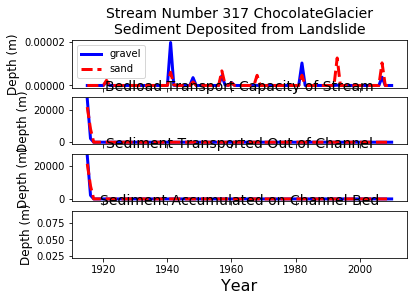

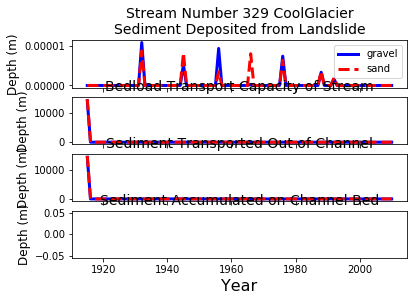

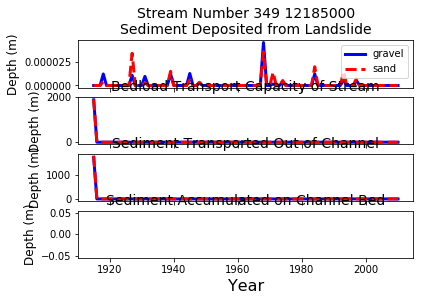

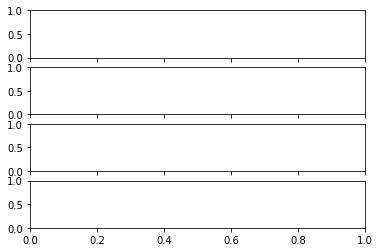

In [221]:
streams_to_plot=[317,329,349,363,368,371]
stream_name=['DustyGlacier','ChocolateGlacier','CoolGlacier','12185000','SuiattleGlacier','HoneycombGlacier']
evaluation_years_plot=np.arange(1915,2011) #np.unique(streamflow.index.year)
i=0
for stream_index in streams_to_plot:  
    i=i+1
    plot_title=''
    fig, (ax1, ax2, ax3, ax4)=plt.subplots(4,1, sharex=True, sharey=False)        
    
    ax1.plot(evaluation_years_plot,
             Vg_mw_annual.loc[stream_index,evaluation_years_plot]/(network.loc[stream_index,'width']*network.loc[stream_index,'segment_length_m']),
             'b-', linewidth=3, label='gravel')
    ax1.plot(evaluation_years_plot,
             Vs_mw_annual.loc[stream_index,evaluation_years_plot]/(network.loc[stream_index,'width']*network.loc[stream_index,'segment_length_m']),
             'r--', linewidth=3, label='sand')
    ax1.set_title('Stream Number '+str(stream_index)+' '+ str(stream_name[i])+'\nSediment Deposited from Landslide',fontsize=14)
    ax1.set_ylabel('Depth (m)',fontsize=12)
    ax1.legend()
    
    ax2.plot(evaluation_years_plot, Vg_cap_annual.loc[stream_index,evaluation_years_plot],'b-', linewidth=3)  
    ax2.plot(evaluation_years_plot, Vs_cap_annual.loc[stream_index,evaluation_years_plot],'r--', linewidth=3)  
    ax2.set_title('Bedload Transport Capacity of Stream',fontsize=14)
    ax2.set_ylabel('Depth (m)',fontsize=12)
    #ax2.set_ylabel('Sediment\nDischarge\n(m3/s)',fontsize=12)
    
    ax3.plot(evaluation_years_plot,Vg_t_annual.loc[stream_index,evaluation_years_plot], 'b-',linewidth=3)
    ax3.plot(evaluation_years_plot,Vs_t_annual.loc[stream_index,evaluation_years_plot], 'r--',linewidth=3)
    ax3.set_title('Sediment Transported Out of Channel',fontsize=14)
    ax3.set_ylabel('Depth (m)',fontsize=12)
    #ax3.set_ylabel('Sediment\nDischarge\n(m3/s)',fontsize=12)
    
    ax4.plot(evaluation_years_plot,
             Vg_b_annual.loc[stream_index,evaluation_years_plot]/(network.loc[stream_index,'width']*network.loc[stream_index,'segment_length_m']),
             'b-', linewidth=3)
    ax4.plot(evaluation_years_plot,
             Vs_b_annual.loc[stream_index,evaluation_years_plot]/(network.loc[stream_index,'width']*network.loc[stream_index,'segment_length_m']),
             'r--', linewidth=3)
    ax4.set_title('Sediment Accumulated on Channel Bed',fontsize=14)
    ax4.set_ylabel('Depth (m)',fontsize=12)
    ax4.set_xlabel('Year',fontsize=16)
    
    sum_transported_gravel=np.sum(Vg_t_annual.loc[stream_index,evaluation_years_plot])
    sum_transported_sand=np.sum(Vs_t_annual.loc[stream_index,evaluation_years_plot])
    sum_transported_mud=np.sum(Vm_t_annual.loc[stream_index,evaluation_years_plot])
    print('Stream Number', stream_index, ', Total gravel transported (10^6 m3)=',sum_transported_gravel/10**6)
    print('Stream Number', stream_index, ', Total sand transported(10^6 m3)=',sum_transported_sand/10**6)
    print('Stream Number', stream_index, ', Total mud transported(10^6 m3)=',sum_transported_mud/10**6)
    print('Stream Number', stream_index, ', Total sediment transported (10^6 m3)=', (sum_transported_gravel+sum_transported_mud+sum_transported_sand)/10**6)
    if stream_index==ref_stream:
        sum_dep_gravel=np.sum(Vg_b_annual.loc[stream_index,evaluation_years_plot[-1]])
        sum_dep_sand=np.sum(Vs_b_annual.loc[stream_index,evaluation_years_plot[-1]])           
        print('Stream Number', stream_index, ', Deposit Sedimentation (10^6 m3)=', (sum_dep_gravel+sum_dep_sand+sum_transported_gravel+sum_transported_sand)*sg/(bd_coarse*10**6))
        print('Stream Number', stream_index, ', Deposit Percent Gravel=', (sum_dep_gravel+sum_transported_gravel)/(sum_dep_gravel+sum_dep_sand+sum_transported_gravel+sum_transported_sand))
        print('Stream Number', stream_index, ', Deposit Percent Sand=', (sum_dep_sand+sum_transported_sand)/(sum_dep_gravel+sum_dep_sand+sum_transported_gravel+sum_transported_sand))
    print('--------------------')


The information, data, or work presented herein was funded in part by the Office of Energy Efficiency and Renewable Energy (EERE), U.S. Department of Energy, under Award Number DE-EE0006506 and the Hydro Research Foundation. Neither the United States Government nor any agency thereof, nor any of their employees, makes and warranty, express or implied, or assumes and legal liability or responsibility for the accuracy, completeness, or usefulness of any information, apparatus, product, or process disclosed, or represents that its use would not infringe privately owned rights. Reference herein to any specific commercial product, process, or service by trade name, trademark, manufacturer, or otherwise does not necessarily constitute or imply its endorsement, recommendation or favoring by the United States Government or any agency thereof. The views and opinions of authors expressed herein do not necessarily state or reflect those of the United States Government or any agency thereof.

[Disclaimer like this needed for BIA funding]

[Christina TO DO - add save back to HydroShare end bits]